# Notebook with Strong and Weak Human

## Libraries

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.stats as st

In [4]:
from statsmodels.stats import inter_rater as irr

In [5]:
import polars as pl
import matplotlib as plt 
import numpy as np
import matplotlib.pyplot as plt
import scipy
pl.Config.set_tbl_rows(250)

polars.config.Config

In [6]:
import sklearn as sk

In [7]:
import pingouin as pg

In [8]:
import pandas as pd

## Data Preparation

In [9]:
gt = pl.read_csv('nice_GT.csv')

In [10]:
dataset = pl.read_csv('Dataset_finale.csv')
dataset.head()

id,HD,ConfH,AI,idC,Conf,GT,HACC,HSPEC,HSENS
i64,i64,f64,i64,str,f64,i64,f64,f64,f64
1,1,0.75,1,"""a""",0.91,1,0.89,0.89,0.89
2,1,0.25,1,"""a""",0.77,1,1.0,1.0,1.0
3,1,0.75,1,"""a""",0.83,1,0.83,0.78,0.89
4,1,0.75,1,"""a""",0.81,1,1.0,1.0,1.0
5,1,0.75,1,"""a""",0.93,1,0.78,0.78,0.78


In [11]:
dataset.shape

(288, 10)

In [481]:
dataset.filter(pl.col('HACC') < np.median(dataset['HACC']))

id,HD,ConfH,AI,idC,Conf,GT,HACC,HSPEC,HSENS
i64,i64,f64,i64,str,f64,i64,f64,f64,f64
3,1,0.75,1,"""a""",0.83,1,0.83,0.78,0.89
5,1,0.75,1,"""a""",0.93,1,0.78,0.78,0.78
9,1,0.5,1,"""a""",0.86,1,0.78,0.67,0.89
10,1,0.75,1,"""a""",0.77,1,0.83,0.89,0.78
12,0,0.25,1,"""a""",0.88,1,0.78,0.67,0.89
15,1,0.75,1,"""a""",0.91,1,0.83,0.89,0.78
3,1,0.25,1,"""b""",0.94,1,0.83,0.78,0.89
5,1,0.25,1,"""b""",0.94,1,0.78,0.78,0.78
9,1,0.75,1,"""b""",0.98,1,0.78,0.67,0.89


In [14]:
strong_h = dataset.filter(pl.col('HACC') >= np.median(dataset['HACC']))
weak_h = dataset.filter(pl.col('HACC') < np.median(dataset['HACC']))

In [9]:
AI_spec = 0.89 
AI_sens = 0.89
AI_acc = 0.89

In [13]:
strong_h.unique('id').shape[0]


10

In [493]:
strong_h_p = strong_h.to_pandas()

In [495]:
icc = pg.intraclass_corr(data=strong_h_p, targets= 'idC', raters='id',
                         ratings='HD').round(3)

In [497]:
icc

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.752,31.266,17,162,0.0,"[0.61, 0.88]"
1,ICC2,Single random raters,0.752,32.278,17,153,0.0,"[0.61, 0.88]"
2,ICC3,Single fixed raters,0.758,32.278,17,153,0.0,"[0.62, 0.88]"
3,ICC1k,Average raters absolute,0.968,31.266,17,162,0.0,"[0.94, 0.99]"
4,ICC2k,Average random raters,0.968,32.278,17,153,0.0,"[0.94, 0.99]"
5,ICC3k,Average fixed raters,0.969,32.278,17,153,0.0,"[0.94, 0.99]"


In [499]:
weak_h_p = weak_h.to_pandas()
icc_w = pg.intraclass_corr(data=weak_h_p, targets= 'idC', raters='id',
                         ratings='HD').round(3)
icc_w

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.475,6.418,17,90,0.0,"[0.28, 0.7]"
1,ICC2,Single random raters,0.474,6.337,17,85,0.0,"[0.28, 0.7]"
2,ICC3,Single fixed raters,0.471,6.337,17,85,0.0,"[0.27, 0.7]"
3,ICC1k,Average raters absolute,0.844,6.418,17,90,0.0,"[0.7, 0.93]"
4,ICC2k,Average random raters,0.844,6.337,17,85,0.0,"[0.7, 0.93]"
5,ICC3k,Average fixed raters,0.842,6.337,17,85,0.0,"[0.69, 0.93]"


In [515]:
orig = strong_h_p.pivot(columns= 'id',index = 'idC', values ='HD')

In [517]:
#test kappa

dats, cats = irr.aggregate_raters(orig)
irr.fleiss_kappa(dats, method='fleiss')

0.7404523544679275

In [524]:
orig = weak_h_p.pivot(columns= 'id',index = 'idC', values ='HD')
dats, cats = irr.aggregate_raters(orig)
irr.fleiss_kappa(dats, method='fleiss')

0.45758513931888545

In [72]:
weak_h.filter(pl.col('idC') == 'm')

id,HD,ConfH,AI,idC,Conf,GT,HACC,HSPEC,HSENS
i64,i64,f64,i64,str,f64,i64,f64,f64,f64
3,1,0.5,0,"""m""",0.82,0,0.83,0.78,0.89
5,0,0.25,0,"""m""",0.95,0,0.78,0.78,0.78
9,1,0.5,0,"""m""",0.81,0,0.78,0.67,0.89
10,1,0.75,0,"""m""",0.79,0,0.83,0.89,0.78
12,0,0.75,0,"""m""",0.89,0,0.78,0.67,0.89
15,0,0.25,0,"""m""",0.94,0,0.83,0.89,0.78


In [74]:
i

1

### IC strong & weak

In [153]:
fn = 0
tn = 0
tp = 0
fp = 0

for j in (weak_h.unique('idC')['idC']):
    temp = weak_h.filter(pl.col('idC') == j)
    for i in range(1,weak_h.unique('id').shape[0]):
        gt_i = gt.filter(pl.col('idC') == j)['GT'][0]
        if (temp['HD'][i] == 1) & (gt_i == 1):
            tp = tp + 1
        if (temp['HD'][i] == 0) & (gt_i == 0):
            tn = tn + 1
        if (temp['HD'][i] == 1) & (gt_i == 0):
            fp = fp + 1
        if (temp['HD'][i] == 0) & (gt_i == 1):
            fn = fn + 1
    

hacc_w = (tn + tp)/ (tn+fp+fn+tp)
hsens_w = tn/(tn+fp)
hspec_w = tp/(tp+fn)

print(f'Weak Metrices: \n Accuracy:{hacc_w} \nSensitivity:{hsens_w} \nSpecificity:{hspec_w}')

Weak Metrices: 
 Accuracy:0.8 
Sensitivity:0.7777777777777778 
Specificity:0.8222222222222222


In [183]:
weak_metrics = [hspec_w, hsens_w, hacc_w]
IC_weak_me = []

for me in weak_metrics:
    p = me
    n = weak_h.shape[0]
    add = 1.96 * np.sqrt(p*(1-p)/n)
    low = p-add 
    hig = p+add
    IC_weak_me.append([low, hig, p])

IC_weak_ = pl.DataFrame(IC_weak_me , schema=["lower", "upper", "metriche"], orient = 'row')
#IC_weak_ = pl.DataFrame(IC_weak_me, schema={"col1": pl.Float32, "col2": pl.Int64})
IC_weak_ 

lower,upper,metriche
f64,f64,f64
0.750115,0.894329,0.822222
0.699369,0.856187,0.777778
0.72456,0.87544,0.8


In [187]:
fn = 0
tn = 0
tp = 0
fp = 0

for j in (strong_h.unique('idC')['idC']):
    temp = strong_h.filter(pl.col('idC') == j)
    for i in range(1,strong_h.unique('id').shape[0]):
        gt_i = gt.filter(pl.col('idC') == j)['GT'][0]
        if (temp['HD'][i] == 1) & (gt_i == 1):
            tp = tp + 1
        if (temp['HD'][i] == 0) & (gt_i == 0):
            tn = tn + 1
        if (temp['HD'][i] == 1) & (gt_i == 0):
            fp = fp + 1
        if (temp['HD'][i] == 0) & (gt_i == 1):
            fn = fn + 1
    

hacc_s = (tn + tp)/ (tn+fp+fn+tp)
hsens_s = tn/(tn+fp)
hspec_s = tp/(tp+fn)

print(f'Weak Metrices: \n Accuracy:{hacc_s} \nSensitivity:{hsens_s} \nSpecificity:{hspec_s}')

strong_metrics = [hspec_s, hsens_s, hacc_s]
IC_strong_me = []

for me in strong_metrics:
    p = me
    n = strong_h.shape[0]
    add = 1.96 * np.sqrt(p*(1-p)/n)
    low = me -add 
    hig = me + add
    IC_strong_me.append([low, hig, me])

IC_strong_me  = pl.DataFrame(IC_strong_me , schema=["lower", "upper", "metriche"], orient = 'row')
IC_strong_me 

Weak Metrices: 
 Accuracy:0.9320987654320988 
Sensitivity:0.9506172839506173 
Specificity:0.9135802469135802


lower,upper,metriche
f64,f64,f64
0.872532,0.954629,0.91358
0.918965,0.98227,0.950617
0.895346,0.968851,0.932099


## Metodi di Coordinamento

In [18]:

class coordinamento:
    def __init__(self, nome):
        self.nome = f'Mi chiamo {nome}'
        
#1. Simple-Majority Protocol: The first and second observer provide their judgments, the third observer is involved if and only if the first two observers disagree. The final decision is the majority choice of the three observers in the team.

    def simp_maj(self,df, id_caso):
        bound = df.unique('id').shape[0]
        risposte = []
        # Filtra solo le righe con l'id_risposta specificato
        caso = df.filter(pl.col('idC') == id_caso)
    
        # Controlla se ci sono abbastanza righe per procedere (almeno 2 persone)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        num = 0
        for i in range(0,bound):
            m = caso['HD'][i]
            
            #dis = 0
            if m == caso['AI'][i]:
                #print(f'Uomo e macchina concordano e hanno scelto {m} per il caso {id_caso}') 
                num = num+1
                risposte.append(m)
            else:
                for j in range(0,bound):
                    if j != i:
                        if m == caso['HD'][j]:
                            risposte.append(m)
                        else:
                            risposte.append(caso['AI'][i])
        print(f'{num} persone corcordano con la macchina nel coordinamento Simple Majority')
        risposte = np.array(risposte)
        risposte = risposte.T
        
        return risposte
            
#2. Accuracy-Oriented Protocol: 
    
    def acc_mean(self,df, id_caso, AI_acc):
        bound = df.unique('id').shape[0]
        risposte = []
            # Filtra solo le righe con l'id_risposta specificato
        caso = df.filter(pl.col('idC') == id_caso)
        
            # Controlla se ci sono abbastanza righe per procedere (almeno 2 persone)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        num = 0
        for i in range(0,bound):
            m = caso['HD'][i]
            n = caso['AI'][i]
            
            for j in range(0,bound):
                if j != i:
                    if caso['HD'][j] == m:
                        med = (caso['HACC'][i] + caso['HACC'][j]) /2
                        
                        if med >= AI_acc:
                            risposte.append(m)
                        else:
                            risposte.append(n)
                    elif caso['HD'][j] == n:
                        med = (caso['HACC'][j] + AI_acc) /2
                        #print(f'mean:{med}, accuratezze:{caso['HACC'][i]}, decisione 1:{m}, decisione macchine:{n}')
                        if med >= caso['HACC'][i]:
                            risposte.append(n)
                        else:
                            risposte.append(m)
                    elif n == m:
                        med = (caso['HACC'][i] + AI_acc) /2
                        
                        if med >= caso['HACC'][j]:
                            risposte.append(m)
                        else:
                            risposte.append(caso['HD'][j])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
            
        return risposte
        
#3. Confidence-Oriented Protocol
    def conf_mean(self,df, id_caso):
        bound = df.unique('id').shape[0]
        risposte = []
            # Filtra solo le righe con l'id_risposta specificato
        caso = df.filter(pl.col('idC') == id_caso)
        
            # Controlla se ci sono abbastanza righe per procedere (almeno 2 persone)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        
        for i in range(0,bound):
            m = caso['HD'][i]
            n = caso['AI'][i]
            
            for j in range(0,bound):
                if j != i:
                    if caso['HD'][j] == m:
                        med = (caso['ConfH'][i] + caso['ConfH'][j]) /2
                        
                        if med >= caso['Conf'][i]:
                            risposte.append(m)
                        else:
                            risposte.append(n)
                    elif caso['HD'][j] == n:
                        med = (caso['ConfH'][j] + caso['Conf'][i]) /2
                        if med >= caso['ConfH'][i]:
                            risposte.append(n)
                        else:
                            risposte.append(m)
                    elif n == m:
                        med = (caso['ConfH'][i] + caso['Conf'][i]) /2
                        
                        if med >= caso['ConfH'][j]:
                            risposte.append(m)
                        else:
                            risposte.append(caso['HD'][j])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
            
        return risposte

        
#4. Specificity-oriented Protocol: The first observer provides its judgment and the second observer is involved if and only if the first observer deemed the case abnormal. If the first two observers disagree, then the third observer is also involved. The final decision is the majority choice of the involved observers weighted by their speci x confi, where specificity also accounts for how confident the observer is in this particular case.
    def spec_oriented(self, df, id_caso, AI_spec):
        bound = df.unique('id').shape[0]
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,bound):
            m = caso['HD'][i]
            n = caso['AI'][i]
            if m == 1:
                if m != n:
                    for j in range(0,bound):
                        if j != i:
                            if caso['HD'][j] == m:
                                pondus = (caso['HSPEC'][j]*caso['ConfH'][j] + caso['HSPEC'][i]*caso['ConfH'][i])/2
                                if pondus > (AI_spec*caso['Conf'][i]):
                                    risposte.append(m)
                                else:
                                    risposte.append(n)
                            else:
                                pondus = (caso['HSPEC'][j]*caso['ConfH'][j] + AI_spec*caso['Conf'][i])/2
                                if pondus > (caso['HSPEC'][i]*caso['ConfH'][i]):
                                    risposte.append(n)
                                else:
                                    risposte.append(m)
                else:
                    risposte.append(m)                                             
            else:
                risposte.append(m)
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte
                           
        
#5. Sensitivity-oriented Protocol: The first observer provides its judgement and the second observer is involved if and only if the first observer deemed the case normal. If the first two observers disagree, then the third observer is also involved. The final decision is the majority choice of the involved observers weighted by their sensi x confi, where sensitivity also accounts for how confident the observer is in this particular case.
    def sens_oriented(self, df, id_caso, AI_sens):
        bound = df.unique('id').shape[0]
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,bound):
            m = caso['HD'][i]
            n = caso['AI'][i]
            if m == 0:
                if m != n:
                    for j in range(0,bound):
                        if j != i:
                            if caso['HD'][j] == m:
                                pondus = (caso['HSENS'][j]*caso['ConfH'][j] + caso['HSENS'][i]*caso['ConfH'][i])/2
                                if pondus > (AI_sens*caso['Conf'][i]):
                                    risposte.append(m)
                                else:
                                    risposte.append(n)
                            else:
                                pondus = (caso['HSENS'][j]*caso['ConfH'][j] + AI_sens*caso['Conf'][i])/2
                                if pondus > (caso['HSENS'][i]*caso['ConfH'][i]):
                                    risposte.append(n)
                                else:
                                    risposte.append(m)
                else:
                    risposte.append(m)                                             
            else:
                risposte.append(m)
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte

#6. Cautious Protocol: The first two observers provide their judgments, their accuracy acc1, acc2, and subjective confidences conf1, conf2. If the two observers agree in their judgment, the team accepts the decision only if both have accuracy and confidence above a defined threshold α (acci ≥ αacc e confi ≥ αconf). Otherwise, if the two observers disagree or if at least one of them has accuracy or confidence below the threshold α, the third observer is involved and the result is the majority choice of the involved observers weighted by their acci x confi, where accuracy also accounts for how confident the observer is in this particular case.
    def cautious(self, df, id_caso, AI_acc):
        bound = df.unique('id').shape[0]
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        tr_acc = df['HACC'].quantile(0.20, "nearest")
        tr_conf = df['ConfH'].quantile(0.25, "nearest")
        for i in range(0,bound):
            m = caso['HD'][i]
            n = caso['AI'][i]
            acc_m = caso['HACC'][i]
            conf_m = caso['ConfH'][i]
            if m == n:
                if (acc_m > tr_acc) & (AI_acc > tr_acc) & (conf_m > tr_conf) & (caso['Conf'][i] > tr_conf):
                    risposte.append(m)
                else:
                    pondus = (acc_m*conf_m + AI_acc*caso['Conf'][i]) /2
                    for j in range(0,bound):
                        if j != i:
                            if pondus > (caso['HACC'][j]*caso['ConfH'][j]):
                                risposte.append(m)
                            else:
                                risposte.append(caso['HD'][j])
            else:
                 for j in range(0,bound):
                        if j != i:
                            if m == caso['HD'][j]:
                                pondus = (acc_m*conf_m + caso['HACC'][j]*caso['ConfH'][j]) /2
                                if pondus > (AI_acc*caso['Conf'][i]):
                                    risposte.append(m)
                                else:
                                    risposte.append(n)
                            else:
                                pondus = (AI_acc*conf_m + caso['HACC'][j]*caso['ConfH'][j]) /2
                                if pondus > (acc_m*caso['Conf'][j]):
                                    risposte.append(n)
                                else:
                                    risposte.append(m)
                                                
                                                                       
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte
        
        
#7. Presumptuous Protocol: The first two observers provide their judgements, their accuracy acc1, acc2, and subjective confidences conf1, conf2. If both observers have accuracy above a defined threshold α (acci ≥ αacc), the team’s decision is the same as the one provided by the observer with greater confidence. If at least one observer has accuracy below the threshold α, the team follows the observer with the highest accuracy.
    def presumptuous(self, df, id_caso, AI_acc):
        bound = df.unique('id').shape[0]
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        tr_acc = df['HACC'].quantile(0.20, "nearest")
        tr_conf = df['ConfH'].quantile(0.25, "nearest")
        for i in range(0,bound):
            m = caso['HD'][i]
            n = caso['AI'][i]
            acc_m = caso['HACC'][i]
            conf_m = caso['ConfH'][i]
            if (acc_m > tr_acc) & (AI_acc > tr_acc):
                if caso['Conf'][i] > conf_m:
                    risposte.append(n)
                else:
                    risposte.append(m)
            else:
                if acc_m > AI_acc:
                    risposte.append(m)
                else:
                    risposte.append(n)
                
        return risposte   
#8. OR Rule: The first observer provides their judgment, the second observer is involved if and only if the interpretation of the first observer is normal and, in that case, the decision of the team is the same as the second observer’s.
    def or_rule(self, df, id_caso):
        bound = df.unique('id').shape[0]
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,bound):
            if caso['HD'][i] == 0:
                risposte.append(caso['AI'][i])
            else:
                risposte.append(caso['HD'][i])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte
        
#9. AND Rule: The first observer provides their judgment, the second observer is involved if and only if the interpretation of the first observer is abnormal and, in that case, the decision of the team is the same as the second observer’s.
    def and_rule(self, df, id_caso):
        bound = df.unique('id').shape[0]
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,bound):
            if caso['HD'][i] == 1:
                risposte.append(caso['AI'][i])
            else:
                risposte.append(caso['HD'][i])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte

In [20]:
coordinamenti = coordinamento('Kasparov')

## Results

### Strong Human

#### Caso A

In [317]:
SM_a = coordinamenti.simp_maj(strong_h, 'a')
ACC_a = coordinamenti.acc_mean(strong_h, 'a', AI_acc)
Conf_a = coordinamenti.conf_mean(strong_h, 'a')
Spec_a = coordinamenti.spec_oriented(strong_h, 'a', AI_spec)
Sens_a = coordinamenti.sens_oriented(strong_h, 'a', AI_sens)
CAU_a = coordinamenti.cautious(strong_h, 'a', AI_acc)
PRE_a = coordinamenti.presumptuous(strong_h, 'a', AI_acc)
AND_a = coordinamenti.and_rule(strong_h, 'a')
OR_a = coordinamenti.or_rule(strong_h, 'a')

data_a = {'Simple-Majority':SM_a, 'Accuracy-Oriented':ACC_a, 'Confidence-Oriented':Conf_a,'Specificity-Oriented': Spec_a,'Sensitivity-Oriented':Sens_a,'Cautious': CAU_a,'Presumptuous': PRE_a,'AND_Rule': AND_a, 'OR_Rule':OR_a}

col1 = pl.Series('Simple-Majority', SM_a)
col2 =  pl.Series('Accuracy-Oriented',ACC_a)
col3 = pl.Series('Confidence-Oriented',Conf_a)
col4 =  pl.Series('Specificity-Oriented', Spec_a)
col5 = pl.Series('Sensitivity-Oriented',Sens_a)
col6 =  pl.Series('Cautious', CAU_a)
col7 = pl.Series('Presumptuous', PRE_a)
col8 = pl.Series('AND_Rule', AND_a)
col9 = pl.Series('OR_Rule',OR_a)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

9 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 18
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 18
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [319]:
len_18 = pl.DataFrame([col1,col5])
df_vuoto = pl.DataFrame({
    col1.name: [None] * 72,
    col5.name: [None] * 72,})
df1 = len_18.vstack(df_vuoto)

len_90 = pl.DataFrame([col2,col3, col6])

len_10 = pl.DataFrame([col4, col7, col8, col9])
df_vuoto = pl.DataFrame({
    col4.name: [None] * 80,
    col7.name: [None] * 80,
    col8.name: [None] * 80,
    col9.name: [None] * 80})
df3 = len_10.vstack(df_vuoto)


In [321]:
caso_a = pl.concat([df1, df3, len_90], how="horizontal")

#### Caso B

In [324]:

SM_b = coordinamenti.simp_maj(strong_h, 'b')
ACC_b = coordinamenti.acc_mean(strong_h, 'b', AI_acc)
Conf_b = coordinamenti.conf_mean(strong_h, 'b')
Spec_b = coordinamenti.spec_oriented(strong_h, 'b', AI_spec)
Sens_b = coordinamenti.sens_oriented(strong_h, 'b', AI_sens)
CAU_b = coordinamenti.cautious(strong_h, 'b', AI_acc)
PRE_b = coordinamenti.presumptuous(strong_h, 'b', AI_acc)
AND_b = coordinamenti.and_rule(strong_h, 'b')
OR_b = coordinamenti.or_rule(strong_h, 'b')

data_b = {'Simple-Majority':SM_b, 'Accuracy-Oriented':ACC_b, 'Confidence-Oriented':Conf_b,'Specificity-Oriented': Spec_b,'Sensitivity-Oriented':Sens_b,'Cautious': CAU_b,'Presumptuous': PRE_b,'AND_Rule': AND_b, 'OR_Rule':OR_b}

col1 = pl.Series('Simple-Majority', SM_b)
col2 =  pl.Series('Accuracy-Oriented',ACC_b)
col3 = pl.Series('Confidence-Oriented',Conf_b)
col4 =  pl.Series('Specificity-Oriented', Spec_b)
col5 = pl.Series('Sensitivity-Oriented',Sens_b)
col6 =  pl.Series('Cautious', CAU_b)
col7 = pl.Series('Presumptuous', PRE_b)
col8 = pl.Series('AND_Rule', AND_b)
col9 = pl.Series('OR_Rule',OR_b)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  


10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [326]:
caso_b = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_b = pl.concat([caso_b, df1], how="horizontal")

caso_b.head()

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso C

In [329]:
SM_c = coordinamenti.simp_maj(strong_h, 'c')
ACC_c = coordinamenti.acc_mean(strong_h, 'c', AI_acc)
Conf_c = coordinamenti.conf_mean(strong_h, 'c')
Spec_c = coordinamenti.spec_oriented(strong_h, 'c', AI_spec)
Sens_c = coordinamenti.sens_oriented(strong_h, 'c', AI_sens)
CAU_c = coordinamenti.cautious(strong_h, 'c', AI_acc)
PRE_c = coordinamenti.presumptuous(strong_h, 'c', AI_acc)
AND_c = coordinamenti.and_rule(strong_h, 'c')
OR_c = coordinamenti.or_rule(strong_h, 'c')

data_c = {'Simple-Majority':SM_c, 'Accuracy-Oriented':ACC_c, 'Confidence-Oriented':Conf_c,'Specificity-Oriented': Spec_c,'Sensitivity-Oriented':Sens_c,'Cautious': CAU_c,'Presumptuous': PRE_c,'AND_Rule': AND_c, 'OR_Rule':OR_c}

col1 = pl.Series('Simple-Majority', SM_c)
col2 =  pl.Series('Accuracy-Oriented',ACC_c)
col3 = pl.Series('Confidence-Oriented',Conf_c)
col4 =  pl.Series('Specificity-Oriented', Spec_c)
col5 = pl.Series('Sensitivity-Oriented',Sens_c)
col6 =  pl.Series('Cautious', CAU_c)
col7 = pl.Series('Presumptuous', PRE_c)
col8 = pl.Series('AND_Rule', AND_c)
col9 = pl.Series('OR_Rule',OR_c)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  



10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [330]:
caso_c = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_c = pl.concat([caso_c, df1], how="horizontal")

caso_c.head()

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso D

In [332]:
SM_d = coordinamenti.simp_maj(strong_h, 'd')
ACC_d = coordinamenti.acc_mean(strong_h, 'd', AI_acc)
Conf_d = coordinamenti.conf_mean(strong_h, 'd')
Spec_d = coordinamenti.spec_oriented(strong_h, 'd', AI_spec)
Sens_d = coordinamenti.sens_oriented(strong_h, 'd', AI_sens)
CAU_d = coordinamenti.cautious(strong_h, 'd', AI_acc)
PRE_d = coordinamenti.presumptuous(strong_h, 'd', AI_acc)
AND_d = coordinamenti.and_rule(strong_h, 'd')
OR_d = coordinamenti.or_rule(strong_h, 'd')

data_d = {'Simple-Majority':SM_d, 'Accuracy-Oriented':ACC_d, 'Confidence-Oriented':Conf_d,'Specificity-Oriented': Spec_d,'Sensitivity-Oriented':Sens_d,'Cautious': CAU_d,'Presumptuous': PRE_d,'AND_Rule': AND_d, 'OR_Rule':OR_d}

col1 = pl.Series('Simple-Majority', SM_d)
col2 =  pl.Series('Accuracy-Oriented',ACC_d)
col3 = pl.Series('Confidence-Oriented',Conf_d)
col4 =  pl.Series('Specificity-Oriented', Spec_d)
col5 = pl.Series('Sensitivity-Oriented',Sens_d)
col6 =  pl.Series('Cautious', CAU_d)
col7 = pl.Series('Presumptuous', PRE_d)
col8 = pl.Series('AND_Rule', AND_d)
col9 = pl.Series('OR_Rule',OR_d)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}') 

7 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 34
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 34
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [333]:
caso_d = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_d = pl.concat([caso_d, df1], how="horizontal")
caso_d

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,0,1,1,0,1
1,0,0,1,1,1,1,1,1
1,1,1,1,0,1,1,0,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso E

In [335]:

SM_e = coordinamenti.simp_maj(strong_h, 'e')
ACC_e = coordinamenti.acc_mean(strong_h, 'e', AI_acc)
Conf_e = coordinamenti.conf_mean(strong_h, 'e')
Spec_e = coordinamenti.spec_oriented(strong_h, 'e', AI_spec)
Sens_e = coordinamenti.sens_oriented(strong_h, 'e', AI_sens)
CAU_e = coordinamenti.cautious(strong_h, 'e', AI_acc)
PRE_e = coordinamenti.presumptuous(strong_h, 'e', AI_acc)
AND_e = coordinamenti.and_rule(strong_h, 'e')
OR_e = coordinamenti.or_rule(strong_h, 'e')

data_e = {'Simple-Majority':SM_e, 'Accuracy-Oriented':ACC_e, 'Confidence-Oriented':Conf_e,'Specificity-Oriented': Spec_e,'Sensitivity-Oriented':Sens_e,'Cautious': CAU_e,'Presumptuous': PRE_e,'AND_Rule': AND_e, 'OR_Rule':OR_e}

col1 = pl.Series('Simple-Majority', SM_e)
col2 =  pl.Series('Accuracy-Oriented',ACC_e)
col3 = pl.Series('Confidence-Oriented',Conf_e)
col4 =  pl.Series('Specificity-Oriented', Spec_e)
col5 = pl.Series('Sensitivity-Oriented',Sens_e)
col6 =  pl.Series('Cautious', CAU_e)
col7 = pl.Series('Presumptuous', PRE_e)
col8 = pl.Series('AND_Rule', AND_e)
col9 = pl.Series('OR_Rule',OR_e)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [337]:
caso_e = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_e = pl.concat([caso_e, df1], how="horizontal")

caso_e

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso F

In [339]:
# Caso F

SM_f = coordinamenti.simp_maj(strong_h, 'f')
ACC_f = coordinamenti.acc_mean(strong_h, 'f', AI_acc)
Conf_f = coordinamenti.conf_mean(strong_h, 'f')
Spec_f = coordinamenti.spec_oriented(strong_h, 'f', AI_spec)
Sens_f = coordinamenti.sens_oriented(strong_h, 'f', AI_sens)
CAU_f = coordinamenti.cautious(strong_h, 'f', AI_acc)
PRE_f = coordinamenti.presumptuous(strong_h, 'f', AI_acc)
AND_f = coordinamenti.and_rule(strong_h, 'f')
OR_f = coordinamenti.or_rule(strong_h, 'f')

data_f = {'Simple-Majority':SM_f, 'Accuracy-Oriented':ACC_f, 'Confidence-Oriented':Conf_f,'Specificity-Oriented': Spec_f,'Sensitivity-Oriented':Sens_f,'Cautious': CAU_f,'Presumptuous': PRE_f,'AND_Rule': AND_f, 'OR_Rule':OR_f}

col1 = pl.Series('Simple-Majority', SM_f)
col2 =  pl.Series('Accuracy-Oriented',ACC_f)
col3 = pl.Series('Confidence-Oriented',Conf_f)
col4 =  pl.Series('Specificity-Oriented', Spec_f)
col5 = pl.Series('Sensitivity-Oriented',Sens_f)
col6 =  pl.Series('Cautious', CAU_f)
col7 = pl.Series('Presumptuous', PRE_f)
col8 = pl.Series('AND_Rule', AND_f)
col9 = pl.Series('OR_Rule',OR_f)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

8 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 26
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 26
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [341]:
caso_f = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_f = pl.concat([caso_f, df1], how="horizontal")

caso_f

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,0,0,1,1,1,1,1,1
1,1,1,1,0,1,1,0,1
1,1,1,1,1,1,1,1,1
1,1,1,1,0,0,1,0,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso G

In [343]:
# Caso G

SM_g = coordinamenti.simp_maj(strong_h, 'g')
ACC_g = coordinamenti.acc_mean(strong_h, 'g', AI_acc)
Conf_g = coordinamenti.conf_mean(strong_h, 'g')
Spec_g = coordinamenti.spec_oriented(strong_h, 'g', AI_spec)
Sens_g = coordinamenti.sens_oriented(strong_h, 'g', AI_sens)
CAU_g = coordinamenti.cautious(strong_h, 'g', AI_acc)
PRE_g = coordinamenti.presumptuous(strong_h, 'g', AI_acc)
AND_g = coordinamenti.and_rule(strong_h, 'g')
OR_g = coordinamenti.or_rule(strong_h, 'g')

data_g = {'Simple-Majority':SM_g, 'Accuracy-Oriented':ACC_g, 'Confidence-Oriented':Conf_g,'Specificity-Oriented': Spec_g,'Sensitivity-Oriented':Sens_g,'Cautious': CAU_g,'Presumptuous': PRE_g,'AND_Rule': AND_g, 'OR_Rule':OR_g}

col1 = pl.Series('Simple-Majority', SM_g)
col2 =  pl.Series('Accuracy-Oriented',ACC_g)
col3 = pl.Series('Confidence-Oriented',Conf_g)
col4 =  pl.Series('Specificity-Oriented', Spec_g)
col5 = pl.Series('Sensitivity-Oriented',Sens_g)
col6 =  pl.Series('Cautious', CAU_g)
col7 = pl.Series('Presumptuous', PRE_g)
col8 = pl.Series('AND_Rule', AND_g)
col9 = pl.Series('OR_Rule',OR_g)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

2 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 74
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 74
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [344]:
caso_g = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_g = pl.concat([caso_g, df1], how="horizontal")

caso_g

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,0,0,0,0,0,0
1,0,0,0,1,1,1,0,1
1,1,1,1,0,1,1,0,1
0,0,0,1,1,1,1,0,1
0,1,1,1,0,1,0,0,1
0,0,0,1,1,1,0,0,1
1,0,0,1,1,1,0,0,1
0,1,1,1,0,1,1,0,1
0,0,0,1,1,1,0,0,1


#### Caso H

In [71]:
# Caso G

SM_h = coordinamenti.simp_maj(strong_h, 'h')
ACC_h = coordinamenti.acc_mean(strong_h, 'h', AI_acc)
Conf_h = coordinamenti.conf_mean(strong_h, 'h')
Spec_h = coordinamenti.spec_oriented(strong_h, 'h', AI_spec)
Sens_h = coordinamenti.sens_oriented(strong_h, 'h', AI_sens)
CAU_h = coordinamenti.cautious(strong_h, 'h', AI_acc)
PRE_h = coordinamenti.presumptuous(strong_h, 'h', AI_acc)
AND_h = coordinamenti.and_rule(strong_h, 'h')
OR_h = coordinamenti.or_rule(strong_h, 'h')

data_h = {'Simple-Majority':SM_h, 'Accuracy-Oriented':ACC_h, 'Confidence-Oriented':Conf_h,'Specificity-Oriented': Spec_h,'Sensitivity-Oriented':Sens_h,'Cautious': CAU_h,'Presumptuous': PRE_h,'AND_Rule': AND_h, 'OR_Rule':OR_h}

col1 = pl.Series('Simple-Majority', SM_h)
col2 =  pl.Series('Accuracy-Oriented',ACC_h)
col3 = pl.Series('Confidence-Oriented',Conf_h)
col4 =  pl.Series('Specificity-Oriented', Spec_h)
col5 = pl.Series('Sensitivity-Oriented',Sens_h)
col6 =  pl.Series('Cautious', CAU_h)
col7 = pl.Series('Presumptuous', PRE_h)
col8 = pl.Series('AND_Rule', AND_h)
col9 = pl.Series('OR_Rule',OR_h)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [73]:
caso_h = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_h = pl.concat([caso_h, df1], how="horizontal")

caso_h

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso I

In [359]:
# Caso G

SM_i = coordinamenti.simp_maj(strong_h, 'i')
ACC_i = coordinamenti.acc_mean(strong_h, 'i', AI_acc)
Conf_i = coordinamenti.conf_mean(strong_h, 'i')
Spec_i = coordinamenti.spec_oriented(strong_h, 'i', AI_spec)
Sens_i = coordinamenti.sens_oriented(strong_h, 'i', AI_sens)
CAU_i = coordinamenti.cautious(strong_h, 'i', AI_acc)
PRE_i = coordinamenti.presumptuous(strong_h, 'i', AI_acc)
AND_i = coordinamenti.and_rule(strong_h, 'i')
OR_i = coordinamenti.or_rule(strong_h, 'i')

data_i = {'Simple-Majority':SM_i, 'Accuracy-Oriented':ACC_i, 'Confidence-Oriented':Conf_i,'Specificity-Oriented': Spec_i,'Sensitivity-Oriented':Sens_i,'Cautious': CAU_i,'Presumptuous': PRE_i,'AND_Rule': AND_i, 'OR_Rule':OR_i}

col1 = pl.Series('Simple-Majority', SM_i)
col2 =  pl.Series('Accuracy-Oriented',ACC_i)
col3 = pl.Series('Confidence-Oriented',Conf_i)
col4 =  pl.Series('Specificity-Oriented', Spec_i)
col5 = pl.Series('Sensitivity-Oriented',Sens_i)
col6 =  pl.Series('Cautious', CAU_i)
col7 = pl.Series('Presumptuous', PRE_i)
col8 = pl.Series('AND_Rule', AND_i)
col9 = pl.Series('OR_Rule',OR_i)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}') 

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [360]:
caso_i = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_i = pl.concat([caso_i, df1], how="horizontal")

caso_i

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


#### Caso L

In [362]:
SM_l = coordinamenti.simp_maj(strong_h, 'l')
ACC_l = coordinamenti.acc_mean(strong_h, 'l', AI_acc)
Conf_l = coordinamenti.conf_mean(strong_h, 'l')
Spec_l = coordinamenti.spec_oriented(strong_h, 'l', AI_spec)
Sens_l = coordinamenti.sens_oriented(strong_h, 'l', AI_sens)
CAU_l = coordinamenti.cautious(strong_h, 'l', AI_acc)
PRE_l = coordinamenti.presumptuous(strong_h, 'l', AI_acc)
AND_l = coordinamenti.and_rule(strong_h, 'l')
OR_l = coordinamenti.or_rule(strong_h, 'l')

data_l = {'Simple-Majority':SM_l, 'Accuracy-Oriented':ACC_l, 'Confidence-Oriented':Conf_l,'Specificity-Oriented': Spec_l,'Sensitivity-Oriented':Sens_l,'Cautious': CAU_l,'Presumptuous': PRE_l,'AND_Rule': AND_l, 'OR_Rule':OR_l}

col1 = pl.Series('Simple-Majority', SM_l)
col2 =  pl.Series('Accuracy-Oriented',ACC_l)
col3 = pl.Series('Confidence-Oriented',Conf_l)
col4 =  pl.Series('Specificity-Oriented', Spec_l)
col5 = pl.Series('Sensitivity-Oriented',Sens_l)
col6 =  pl.Series('Cautious', CAU_l)
col7 = pl.Series('Presumptuous', PRE_l)
col8 = pl.Series('AND_Rule', AND_l)
col9 = pl.Series('OR_Rule',OR_l)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

9 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 18
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 18
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [363]:
caso_l = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_l = pl.concat([caso_l, df1], how="horizontal")

caso_l

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,1,0,0,1,0,0,1
0,0,1,0,0,0,0,0,0
0,1,1,0,1,0,0,0,0
0,0,1,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0
0,1,1,0,1,0,0,0,0
0,1,1,0,1,0,0,0,0


#### Caso M

In [366]:
SM_m = coordinamenti.simp_maj(strong_h, 'm')
ACC_m = coordinamenti.acc_mean(strong_h, 'm', AI_acc)
Conf_m = coordinamenti.conf_mean(strong_h, 'm')
Spec_m = coordinamenti.spec_oriented(strong_h, 'm', AI_spec)
Sens_m = coordinamenti.sens_oriented(strong_h, 'm', AI_sens)
CAU_m = coordinamenti.cautious(strong_h, 'm', AI_acc)
PRE_m = coordinamenti.presumptuous(strong_h, 'm', AI_acc)
AND_m = coordinamenti.and_rule(strong_h, 'm')
OR_m = coordinamenti.or_rule(strong_h, 'm')

data_m = {'Simple-Majority':SM_m, 'Accuracy-Oriented':ACC_m, 'Confidence-Oriented':Conf_m,'Specificity-Oriented': Spec_m,'Sensitivity-Oriented':Sens_m,'Cautious': CAU_m,'Presumptuous': PRE_m,'AND_Rule': AND_m, 'OR_Rule':OR_m}

col1 = pl.Series('Simple-Majority', SM_m)
col2 =  pl.Series('Accuracy-Oriented',ACC_m)
col3 = pl.Series('Confidence-Oriented',Conf_m)
col4 =  pl.Series('Specificity-Oriented', Spec_m)
col5 = pl.Series('Sensitivity-Oriented',Sens_m)
col6 =  pl.Series('Cautious', CAU_m)
col7 = pl.Series('Presumptuous', PRE_m)
col8 = pl.Series('AND_Rule', AND_m)
col9 = pl.Series('OR_Rule',OR_m)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [368]:
caso_m = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_m = pl.concat([caso_m, df1], how="horizontal")

caso_m

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


#### Caso N

In [370]:
SM_n = coordinamenti.simp_maj(strong_h, 'n')
ACC_n = coordinamenti.acc_mean(strong_h, 'n', AI_acc)
Conf_n = coordinamenti.conf_mean(strong_h, 'n')
Spec_n = coordinamenti.spec_oriented(strong_h, 'n', AI_spec)
Sens_n = coordinamenti.sens_oriented(strong_h, 'n', AI_sens)
CAU_n = coordinamenti.cautious(strong_h, 'n', AI_acc)
PRE_n = coordinamenti.presumptuous(strong_h, 'n', AI_acc)
AND_n = coordinamenti.and_rule(strong_h, 'n')
OR_n = coordinamenti.or_rule(strong_h, 'n')

data_n = {'Simple-Majority':SM_n, 'Accuracy-Oriented':ACC_n, 'Confidence-Oriented':Conf_n,'Specificity-Oriented': Spec_n,'Sensitivity-Oriented':Sens_n,'Cautious': CAU_n,'Presumptuous': PRE_n,'AND_Rule': AND_n, 'OR_Rule':OR_n}

col1 = pl.Series('Simple-Majority', SM_n)
col2 =  pl.Series('Accuracy-Oriented',ACC_n)
col3 = pl.Series('Confidence-Oriented',Conf_n)
col4 =  pl.Series('Specificity-Oriented', Spec_n)
col5 = pl.Series('Sensitivity-Oriented',Sens_n)
col6 =  pl.Series('Cautious', CAU_n)
col7 = pl.Series('Presumptuous', PRE_n)
col8 = pl.Series('AND_Rule', AND_n)
col9 = pl.Series('OR_Rule',OR_n)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

9 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 18
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 18
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [371]:
caso_n = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_n = pl.concat([caso_n, df1], how="horizontal")

caso_n

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
0,0,0,0,0,1,1,0,1
0,0,0,0,0,0,0,0,0


#### Caso O

In [373]:
SM_o = coordinamenti.simp_maj(strong_h, 'o')
ACC_o = coordinamenti.acc_mean(strong_h, 'o', AI_acc)
Conf_o = coordinamenti.conf_mean(strong_h, 'o')
Spec_o = coordinamenti.spec_oriented(strong_h, 'o', AI_spec)
Sens_o = coordinamenti.sens_oriented(strong_h, 'o', AI_sens)
CAU_o = coordinamenti.cautious(strong_h, 'o', AI_acc)
PRE_o = coordinamenti.presumptuous(strong_h, 'o', AI_acc)
AND_o = coordinamenti.and_rule(strong_h, 'o')
OR_o = coordinamenti.or_rule(strong_h, 'o')

data_o = {'Simple-Majority':SM_o, 'Accuracy-Oriented':ACC_o, 'Confidence-Oriented':Conf_o,'Specificity-Oriented': Spec_o,'Sensitivity-Oriented':Sens_o,'Cautious': CAU_o,'Presumptuous': PRE_o,'AND_Rule': AND_o, 'OR_Rule':OR_o}

col1 = pl.Series('Simple-Majority', SM_o)
col2 =  pl.Series('Accuracy-Oriented',ACC_o)
col3 = pl.Series('Confidence-Oriented',Conf_o)
col4 =  pl.Series('Specificity-Oriented', Spec_o)
col5 = pl.Series('Sensitivity-Oriented',Sens_o)
col6 =  pl.Series('Cautious', CAU_o)
col7 = pl.Series('Presumptuous', PRE_o)
col8 = pl.Series('AND_Rule', AND_o)
col9 = pl.Series('OR_Rule',OR_o)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

9 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 18
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 18
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [374]:
caso_o = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_o = pl.concat([caso_o, df1], how="horizontal")

caso_o

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,1


#### Caso P

In [376]:
SM_p = coordinamenti.simp_maj(strong_h, 'p')
ACC_p = coordinamenti.acc_mean(strong_h, 'p', AI_acc)
Conf_p = coordinamenti.conf_mean(strong_h, 'p')
Spec_p = coordinamenti.spec_oriented(strong_h, 'p', AI_spec)
Sens_p = coordinamenti.sens_oriented(strong_h, 'p', AI_sens)
CAU_p = coordinamenti.cautious(strong_h, 'p', AI_acc)
PRE_p = coordinamenti.presumptuous(strong_h, 'p', AI_acc)
AND_p = coordinamenti.and_rule(strong_h, 'p')
OR_p = coordinamenti.or_rule(strong_h, 'p')

data_p = {'Simple-Majority':SM_p, 'Accuracy-Oriented':ACC_p, 'Confidence-Oriented':Conf_p,'Specificity-Oriented': Spec_p,'Sensitivity-Oriented':Sens_p,'Cautious': CAU_p,'Presumptuous': PRE_p,'AND_Rule': AND_p, 'OR_Rule':OR_p}

col1 = pl.Series('Simple-Majority', SM_p)
col2 =  pl.Series('Accuracy-Oriented',ACC_p)
col3 = pl.Series('Confidence-Oriented',Conf_p)
col4 =  pl.Series('Specificity-Oriented', Spec_p)
col5 = pl.Series('Sensitivity-Oriented',Sens_p)
col6 =  pl.Series('Cautious', CAU_p)
col7 = pl.Series('Presumptuous', PRE_p)
col8 = pl.Series('AND_Rule', AND_p)
col9 = pl.Series('OR_Rule',OR_p)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

2 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 74
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 74
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [377]:
caso_p = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_p = pl.concat([caso_p, df1], how="horizontal")

caso_p

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,1,0,1
0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,1
0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,1,0,1
0,0,0,0,1,1,1,1,1
0,1,1,0,0,1,1,0,1
1,0,0,1,0,0,0,0,1
0,0,0,0,1,1,1,1,1


#### Caso Q

In [380]:
SM_q = coordinamenti.simp_maj(strong_h, 'q')
ACC_q = coordinamenti.acc_mean(strong_h, 'q', AI_acc)
Conf_q = coordinamenti.conf_mean(strong_h, 'q')
Spec_q = coordinamenti.spec_oriented(strong_h, 'q', AI_spec)
Sens_q = coordinamenti.sens_oriented(strong_h, 'q', AI_sens)
CAU_q = coordinamenti.cautious(strong_h, 'q', AI_acc)
PRE_q = coordinamenti.presumptuous(strong_h, 'q', AI_acc)
AND_q = coordinamenti.and_rule(strong_h, 'q')
OR_q = coordinamenti.or_rule(strong_h, 'q')

data_q = {'Simple-Majority':SM_q, 'Accuracy-Oriented':ACC_q, 'Confidence-Oriented':Conf_q,'Specificity-Oriented': Spec_q,'Sensitivity-Oriented':Sens_q,'Cautious': CAU_q,'Presumptuous': PRE_q,'AND_Rule': AND_q, 'OR_Rule':OR_q}

col1 = pl.Series('Simple-Majority', SM_q)
col2 =  pl.Series('Accuracy-Oriented',ACC_q)
col3 = pl.Series('Confidence-Oriented',Conf_q)
col4 =  pl.Series('Specificity-Oriented', Spec_q)
col5 = pl.Series('Sensitivity-Oriented',Sens_q)
col6 =  pl.Series('Cautious', CAU_q)
col7 = pl.Series('Presumptuous', PRE_q)
col8 = pl.Series('AND_Rule', AND_q)
col9 = pl.Series('OR_Rule',OR_q)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [381]:
caso_q = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_q = pl.concat([caso_q, df1], how="horizontal")

caso_q

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


#### Caso R

In [383]:
SM_r = coordinamenti.simp_maj(strong_h, 'r')
ACC_r = coordinamenti.acc_mean(strong_h, 'r', AI_acc)
Conf_r = coordinamenti.conf_mean(strong_h, 'r')
Spec_r = coordinamenti.spec_oriented(strong_h, 'r', AI_spec)
Sens_r = coordinamenti.sens_oriented(strong_h, 'r', AI_sens)
CAU_r = coordinamenti.cautious(strong_h, 'r', AI_acc)
PRE_r = coordinamenti.presumptuous(strong_h, 'r', AI_acc)
AND_r = coordinamenti.and_rule(strong_h, 'r')
OR_r = coordinamenti.or_rule(strong_h, 'r')

data_r = {'Simple-Majority':SM_r, 'Accuracy-Oriented':ACC_r, 'Confidence-Oriented':Conf_r,'Specificity-Oriented': Spec_r,'Sensitivity-Oriented':Sens_r,'Cautious': CAU_r,'Presumptuous': PRE_r,'AND_Rule': AND_r, 'OR_Rule':OR_r}

col1 = pl.Series('Simple-Majority', SM_r)
col2 =  pl.Series('Accuracy-Oriented',ACC_r)
col3 = pl.Series('Confidence-Oriented',Conf_r)
col4 =  pl.Series('Specificity-Oriented', Spec_r)
col5 = pl.Series('Sensitivity-Oriented',Sens_r)
col6 =  pl.Series('Cautious', CAU_r)
col7 = pl.Series('Presumptuous', PRE_r)
col8 = pl.Series('AND_Rule', AND_r)
col9 = pl.Series('OR_Rule',OR_r)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [384]:
caso_r = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_r = pl.concat([caso_r, df1], how="horizontal")

caso_r

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


#### Caso S

In [386]:
SM_s = coordinamenti.simp_maj(strong_h, 's')
ACC_s = coordinamenti.acc_mean(strong_h, 's', AI_acc)
Conf_s = coordinamenti.conf_mean(strong_h, 's')
Spec_s = coordinamenti.spec_oriented(strong_h, 's', AI_spec)
Sens_s = coordinamenti.sens_oriented(strong_h, 's', AI_sens)
CAU_s = coordinamenti.cautious(strong_h, 's', AI_acc)
PRE_s = coordinamenti.presumptuous(strong_h, 's', AI_acc)
AND_s = coordinamenti.and_rule(strong_h, 's')
OR_s = coordinamenti.or_rule(strong_h, 's')

data_s = {'Simple-Majority':SM_s, 'Accuracy-Oriented':ACC_s, 'Confidence-Oriented':Conf_s,'Specificity-Oriented': Spec_s,'Sensitivity-Oriented':Sens_s,'Cautious': CAU_s,'Presumptuous': PRE_s,'AND_Rule': AND_s, 'OR_Rule':OR_s}

col1 = pl.Series('Simple-Majority', SM_s)
col2 =  pl.Series('Accuracy-Oriented',ACC_s)
col3 = pl.Series('Confidence-Oriented',Conf_s)
col4 =  pl.Series('Specificity-Oriented', Spec_s)
col5 = pl.Series('Sensitivity-Oriented',Sens_s)
col6 =  pl.Series('Cautious', CAU_s)
col7 = pl.Series('Presumptuous', PRE_s)
col8 = pl.Series('AND_Rule', AND_s)
col9 = pl.Series('OR_Rule',OR_s)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}') 

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [387]:
caso_s = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_s = pl.concat([caso_s, df1], how="horizontal")

caso_s

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso T

In [389]:
SM_t = coordinamenti.simp_maj(strong_h, 't')
ACC_t = coordinamenti.acc_mean(strong_h, 't', AI_acc)
Conf_t = coordinamenti.conf_mean(strong_h, 't')
Spec_t = coordinamenti.spec_oriented(strong_h, 't', AI_spec)
Sens_t = coordinamenti.sens_oriented(strong_h, 't', AI_sens)
CAU_t = coordinamenti.cautious(strong_h, 't', AI_acc)
PRE_t = coordinamenti.presumptuous(strong_h, 't', AI_acc)
AND_t = coordinamenti.and_rule(strong_h, 't')
OR_t= coordinamenti.or_rule(strong_h, 't')

data_t = {'Simple-Majority':SM_t, 'Accuracy-Oriented':ACC_t, 'Confidence-Oriented':Conf_t,'Specificity-Oriented': Spec_t,'Sensitivity-Oriented':Sens_t,'Cautious': CAU_t,'Presumptuous': PRE_t,'AND_Rule': AND_t, 'OR_Rule':OR_t}

col1 = pl.Series('Simple-Majority', SM_t)
col2 =  pl.Series('Accuracy-Oriented',ACC_t)
col3 = pl.Series('Confidence-Oriented',Conf_t)
col4 =  pl.Series('Specificity-Oriented', Spec_t)
col5 = pl.Series('Sensitivity-Oriented',Sens_t)
col6 =  pl.Series('Cautious', CAU_t)
col7 = pl.Series('Presumptuous', PRE_t)
col8 = pl.Series('AND_Rule', AND_t)
col9 = pl.Series('OR_Rule',OR_t)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

10 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 90
Lista Confidence-Oriented ha lunghezza 90
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 90
Lista Presumptuous ha lunghezza 10
Lista AND_Rule ha lunghezza 10
Lista OR_Rule ha lunghezza 10


In [390]:
caso_t = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 90 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_t = pl.concat([caso_t, df1], how="horizontal")

caso_t

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


### Weak Human

#### Caso A

In [393]:
SM_wa = coordinamenti.simp_maj(weak_h, 'a')
ACC_wa = coordinamenti.acc_mean(weak_h, 'a', AI_acc)
Conf_wa = coordinamenti.conf_mean(weak_h, 'a')
Spec_wa = coordinamenti.spec_oriented(weak_h, 'a', AI_spec)
Sens_wa = coordinamenti.sens_oriented(weak_h, 'a', AI_sens)
CAU_wa = coordinamenti.cautious(weak_h, 'a', AI_acc)
PRE_wa = coordinamenti.presumptuous(weak_h, 'a', AI_acc)
AND_wa = coordinamenti.and_rule(weak_h, 'a')
OR_wa = coordinamenti.or_rule(weak_h, 'a')

data_wa = {'Simple-Majority':SM_wa, 'Accuracy-Oriented':ACC_wa, 'Confidence-Oriented':Conf_wa,'Specificity-Oriented': Spec_wa,'Sensitivity-Oriented':Sens_wa,'Cautious': CAU_wa,'Presumptuous': PRE_wa,'AND_Rule': AND_wa, 'OR_Rule':OR_wa}

col1 = pl.Series('Simple-Majority', SM_wa)
col2 =  pl.Series('Accuracy-Oriented',ACC_wa)
col3 = pl.Series('Confidence-Oriented',Conf_wa)
col4 =  pl.Series('Specificity-Oriented', Spec_wa)
col5 = pl.Series('Sensitivity-Oriented',Sens_wa)
col6 =  pl.Series('Cautious', CAU_wa)
col7 = pl.Series('Presumptuous', PRE_wa)
col8 = pl.Series('AND_Rule', AND_wa)
col9 = pl.Series('OR_Rule',OR_wa)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

5 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 18
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [394]:
caso_wa = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wa = pl.concat([caso_wa, df1], how="horizontal")

caso_wa.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,0,1


#### Caso B

In [396]:

SM_wb = coordinamenti.simp_maj(weak_h, 'b')
ACC_wb = coordinamenti.acc_mean(weak_h, 'b', AI_acc)
Conf_wb = coordinamenti.conf_mean(weak_h, 'b')
Spec_wb = coordinamenti.spec_oriented(weak_h, 'b', AI_spec)
Sens_wb = coordinamenti.sens_oriented(weak_h, 'b', AI_sens)
CAU_wb = coordinamenti.cautious(weak_h, 'b', AI_acc)
PRE_wb = coordinamenti.presumptuous(weak_h, 'b', AI_acc)
AND_wb = coordinamenti.and_rule(weak_h, 'b')
OR_wb = coordinamenti.or_rule(weak_h, 'b')

data_b = {'Simple-Majority':SM_wb, 'Accuracy-Oriented':ACC_wb, 'Confidence-Oriented':Conf_wb,'Specificity-Oriented': Spec_wb,'Sensitivity-Oriented':Sens_b,'Cautious': CAU_b,'Presumptuous': PRE_b,'AND_Rule': AND_b, 'OR_Rule':OR_b}

col1 = pl.Series('Simple-Majority', SM_wb)
col2 =  pl.Series('Accuracy-Oriented',ACC_wb)
col3 = pl.Series('Confidence-Oriented',Conf_wb)
col4 =  pl.Series('Specificity-Oriented', Spec_wb)
col5 = pl.Series('Sensitivity-Oriented',Sens_wb)
col6 =  pl.Series('Cautious', CAU_wb)
col7 = pl.Series('Presumptuous', PRE_wb)
col8 = pl.Series('AND_Rule', AND_wb)
col9 = pl.Series('OR_Rule',OR_wb)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  


6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 30
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [397]:
caso_wb = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wb = pl.concat([caso_wb, df1], how="horizontal")

caso_wb.head()

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso C

In [399]:
SM_wc = coordinamenti.simp_maj(weak_h, 'c')
ACC_wc = coordinamenti.acc_mean(weak_h, 'c', AI_acc)
Conf_wc = coordinamenti.conf_mean(weak_h, 'c')
Spec_wc = coordinamenti.spec_oriented(weak_h, 'c', AI_spec)
Sens_wc = coordinamenti.sens_oriented(weak_h, 'c', AI_sens)
CAU_wc = coordinamenti.cautious(weak_h, 'c', AI_acc)
PRE_wc = coordinamenti.presumptuous(weak_h, 'c', AI_acc)
AND_wc = coordinamenti.and_rule(weak_h, 'c')
OR_wc = coordinamenti.or_rule(weak_h, 'c')

data_wc = {'Simple-Majority':SM_wc, 'Accuracy-Oriented':ACC_wc, 'Confidence-Oriented':Conf_wc,'Specificity-Oriented': Spec_wc,'Sensitivity-Oriented':Sens_wc,'Cautious': CAU_wc,'Presumptuous': PRE_wc,'AND_Rule': AND_wc, 'OR_Rule':OR_wc}

col1 = pl.Series('Simple-Majority', SM_wc)
col2 =  pl.Series('Accuracy-Oriented',ACC_wc)
col3 = pl.Series('Confidence-Oriented',Conf_wc)
col4 =  pl.Series('Specificity-Oriented', Spec_wc)
col5 = pl.Series('Sensitivity-Oriented',Sens_wc)
col6 =  pl.Series('Cautious', CAU_wc)
col7 = pl.Series('Presumptuous', PRE_wc)
col8 = pl.Series('AND_Rule', AND_wc)
col9 = pl.Series('OR_Rule',OR_wc)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  



6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 30
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [400]:
caso_wc = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wc = pl.concat([caso_wc, df1], how="horizontal")

caso_wc.head()

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso D

In [402]:
SM_wd = coordinamenti.simp_maj(weak_h, 'd')
ACC_wd = coordinamenti.acc_mean(weak_h, 'd', AI_acc)
Conf_wd = coordinamenti.conf_mean(weak_h, 'd')
Spec_wd = coordinamenti.spec_oriented(weak_h, 'd', AI_spec)
Sens_wd = coordinamenti.sens_oriented(weak_h, 'd', AI_sens)
CAU_wd = coordinamenti.cautious(weak_h, 'd', AI_acc)
PRE_wd = coordinamenti.presumptuous(weak_h, 'd', AI_acc)
AND_wd = coordinamenti.and_rule(weak_h, 'd')
OR_wd = coordinamenti.or_rule(weak_h, 'd')

data_d = {'Simple-Majority':SM_wd, 'Accuracy-Oriented':ACC_wd, 'Confidence-Oriented':Conf_wd,'Specificity-Oriented': Spec_wd,'Sensitivity-Oriented':Sens_wd,'Cautious': CAU_wd,'Presumptuous': PRE_wd,'AND_Rule': AND_wd, 'OR_Rule':OR_wd}

col1 = pl.Series('Simple-Majority', SM_wd)
col2 =  pl.Series('Accuracy-Oriented',ACC_wd)
col3 = pl.Series('Confidence-Oriented',Conf_wd)
col4 =  pl.Series('Specificity-Oriented', Spec_wd)
col5 = pl.Series('Sensitivity-Oriented',Sens_wd)
col6 =  pl.Series('Cautious', CAU_wd)
col7 = pl.Series('Presumptuous', PRE_wd)
col8 = pl.Series('AND_Rule', AND_wd)
col9 = pl.Series('OR_Rule',OR_wd)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}') 

3 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 18
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 18
Lista Cautious ha lunghezza 26
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [403]:
caso_wd = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wd = pl.concat([caso_wd, df1], how="horizontal")

caso_wd.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,0,1,0,1,0,1
1,1,1,1,1,0,1,1,1
1,1,0,0,1,1,1,0,1
1,1,1,1,1,0,1,1,1


#### Caso E

In [430]:

SM_e = coordinamenti.simp_maj(weak_h, 'e')
ACC_e = coordinamenti.acc_mean(weak_h, 'e', AI_acc)
Conf_e = coordinamenti.conf_mean(weak_h, 'e')
Spec_e = coordinamenti.spec_oriented(weak_h, 'e', AI_spec)
Sens_e = coordinamenti.sens_oriented(weak_h, 'e', AI_sens)
CAU_e = coordinamenti.cautious(weak_h, 'e', AI_acc)
PRE_e = coordinamenti.presumptuous(weak_h, 'e', AI_acc)
AND_e = coordinamenti.and_rule(weak_h, 'e')
OR_e = coordinamenti.or_rule(weak_h, 'e')

#data_e = {'Simple-Majority':SM_e, 'Accuracy-Oriented':ACC_e, 'Confidence-Oriented':Conf_e,'Specificity-Oriented': Spec_e,'Sensitivity-Oriented':Sens_e,'Cautious': CAU_e,'Presumptuous': PRE_e,'AND_Rule': AND_e, 'OR_Rule':OR_e}

col1 = pl.Series('Simple-Majority', SM_e)
col2 =  pl.Series('Accuracy-Oriented',ACC_e)
col3 = pl.Series('Confidence-Oriented',Conf_e)
col4 =  pl.Series('Specificity-Oriented', Spec_e)
col5 = pl.Series('Sensitivity-Oriented',Sens_e)
col6 =  pl.Series('Cautious', CAU_e)
col7 = pl.Series('Presumptuous', PRE_e)
col8 = pl.Series('AND_Rule', AND_e)
col9 = pl.Series('OR_Rule',OR_e)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 26
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [432]:
caso_we = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_we = pl.concat([caso_we, df1], how="horizontal")

caso_we.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso F

In [435]:
# Caso F

SM_f = coordinamenti.simp_maj(weak_h, 'f')
ACC_f = coordinamenti.acc_mean(weak_h, 'f', AI_acc)
Conf_f = coordinamenti.conf_mean(weak_h, 'f')
Spec_f = coordinamenti.spec_oriented(weak_h, 'f', AI_spec)
Sens_f = coordinamenti.sens_oriented(weak_h, 'f', AI_sens)
CAU_f = coordinamenti.cautious(weak_h, 'f', AI_acc)
PRE_f = coordinamenti.presumptuous(weak_h, 'f', AI_acc)
AND_f = coordinamenti.and_rule(weak_h, 'f')
OR_f = coordinamenti.or_rule(weak_h, 'f')

#data_f = {'Simple-Majority':SM_f, 'Accuracy-Oriented':ACC_f, 'Confidence-Oriented':Conf_f,'Specificity-Oriented': Spec_f,'Sensitivity-Oriented':Sens_f,'Cautious': CAU_f,'Presumptuous': PRE_f,'AND_Rule': AND_f, 'OR_Rule':OR_f}

col1 = pl.Series('Simple-Majority', SM_f)
col2 =  pl.Series('Accuracy-Oriented',ACC_f)
col3 = pl.Series('Confidence-Oriented',Conf_f)
col4 =  pl.Series('Specificity-Oriented', Spec_f)
col5 = pl.Series('Sensitivity-Oriented',Sens_f)
col6 =  pl.Series('Cautious', CAU_f)
col7 = pl.Series('Presumptuous', PRE_f)
col8 = pl.Series('AND_Rule', AND_f)
col9 = pl.Series('OR_Rule',OR_f)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 18
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [437]:
caso_wf = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wf = pl.concat([caso_wf, df1], how="horizontal")

caso_wf.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso G

In [440]:
# Caso G

SM_g = coordinamenti.simp_maj(weak_h, 'g')
ACC_g = coordinamenti.acc_mean(weak_h, 'g', AI_acc)
Conf_g = coordinamenti.conf_mean(weak_h, 'g')
Spec_g = coordinamenti.spec_oriented(weak_h, 'g', AI_spec)
Sens_g = coordinamenti.sens_oriented(weak_h, 'g', AI_sens)
CAU_g = coordinamenti.cautious(weak_h, 'g', AI_acc)
PRE_g = coordinamenti.presumptuous(weak_h, 'g', AI_acc)
AND_g = coordinamenti.and_rule(weak_h, 'g')
OR_g = coordinamenti.or_rule(weak_h, 'g')

#data_g = {'Simple-Majority':SM_g, 'Accuracy-Oriented':ACC_g, 'Confidence-Oriented':Conf_g,'Specificity-Oriented': Spec_g,'Sensitivity-Oriented':Sens_g,'Cautious': CAU_g,'Presumptuous': PRE_g,'AND_Rule': AND_g, 'OR_Rule':OR_g}

col1 = pl.Series('Simple-Majority', SM_g)
col2 =  pl.Series('Accuracy-Oriented',ACC_g)
col3 = pl.Series('Confidence-Oriented',Conf_g)
col4 =  pl.Series('Specificity-Oriented', Spec_g)
col5 = pl.Series('Sensitivity-Oriented',Sens_g)
col6 =  pl.Series('Cautious', CAU_g)
col7 = pl.Series('Presumptuous', PRE_g)
col8 = pl.Series('AND_Rule', AND_g)
col9 = pl.Series('OR_Rule',OR_g)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

4 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 14
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 14
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 22
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [442]:
caso_wg = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wg = pl.concat([caso_wg, df1], how="horizontal")

caso_wg.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0
0,0,0,1,1,1,1,0,1
0,0,0,1,1,0,0,0,1


#### Caso H

In [105]:
# Caso G

SM_h = coordinamenti.simp_maj(weak_h, 'h')
ACC_h = coordinamenti.acc_mean(weak_h, 'h', AI_acc)
Conf_h = coordinamenti.conf_mean(weak_h, 'h')
Spec_h = coordinamenti.spec_oriented(weak_h, 'h', AI_spec)
Sens_h = coordinamenti.sens_oriented(weak_h, 'h', AI_sens)
CAU_h = coordinamenti.cautious(weak_h, 'h', AI_acc)
PRE_h = coordinamenti.presumptuous(weak_h, 'h', AI_acc)
AND_h = coordinamenti.and_rule(weak_h, 'h')
OR_h = coordinamenti.or_rule(weak_h, 'h')

#data_h = {'Simple-Majority':SM_h, 'Accuracy-Oriented':ACC_h, 'Confidence-Oriented':Conf_h,'Specificity-Oriented': Spec_h,'Sensitivity-Oriented':Sens_h,'Cautious': CAU_h,'Presumptuous': PRE_h,'AND_Rule': AND_h, 'OR_Rule':OR_h}

col1 = pl.Series('Simple-Majority', SM_h)
col2 =  pl.Series('Accuracy-Oriented',ACC_h)
col3 = pl.Series('Confidence-Oriented',Conf_h)
col4 =  pl.Series('Specificity-Oriented', Spec_h)
col5 = pl.Series('Sensitivity-Oriented',Sens_h)
col6 =  pl.Series('Cautious', CAU_h)
col7 = pl.Series('Presumptuous', PRE_h)
col8 = pl.Series('AND_Rule', AND_h)
col9 = pl.Series('OR_Rule',OR_h)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 30
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [107]:
caso_wh = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wh = pl.concat([caso_wh, df1], how="horizontal")

caso_wh.head()

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


#### Caso I

In [450]:
SM_i = coordinamenti.simp_maj(weak_h, 'i')
ACC_i = coordinamenti.acc_mean(weak_h, 'i', AI_acc)
Conf_i = coordinamenti.conf_mean(weak_h, 'i')
Spec_i = coordinamenti.spec_oriented(weak_h, 'i', AI_spec)
Sens_i = coordinamenti.sens_oriented(weak_h, 'i', AI_sens)
CAU_i = coordinamenti.cautious(weak_h, 'i', AI_acc)
PRE_i = coordinamenti.presumptuous(weak_h, 'i', AI_acc)
AND_i = coordinamenti.and_rule(weak_h, 'i')
OR_i = coordinamenti.or_rule(weak_h, 'i')

#data_i = {'Simple-Majority':SM_i, 'Accuracy-Oriented':ACC_i, 'Confidence-Oriented':Conf_i,'Specificity-Oriented': Spec_i,'Sensitivity-Oriented':Sens_i,'Cautious': CAU_i,'Presumptuous': PRE_i,'AND_Rule': AND_i, 'OR_Rule':OR_i}

col1 = pl.Series('Simple-Majority', SM_i)
col2 =  pl.Series('Accuracy-Oriented',ACC_i)
col3 = pl.Series('Confidence-Oriented',Conf_i)
col4 =  pl.Series('Specificity-Oriented', Spec_i)
col5 = pl.Series('Sensitivity-Oriented',Sens_i)
col6 =  pl.Series('Cautious', CAU_i)
col7 = pl.Series('Presumptuous', PRE_i)
col8 = pl.Series('AND_Rule', AND_i)
col9 = pl.Series('OR_Rule',OR_i)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}') 

5 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 10
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 18
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [452]:
caso_wi = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wi = pl.concat([caso_wi, df1], how="horizontal")

caso_wi.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,1


#### Caso L

In [455]:
SM_l = coordinamenti.simp_maj(weak_h, 'l')
ACC_l = coordinamenti.acc_mean(weak_h, 'l', AI_acc)
Conf_l = coordinamenti.conf_mean(weak_h, 'l')
Spec_l = coordinamenti.spec_oriented(weak_h, 'l', AI_spec)
Sens_l = coordinamenti.sens_oriented(weak_h, 'l', AI_sens)
CAU_l = coordinamenti.cautious(weak_h, 'l', AI_acc)
PRE_l = coordinamenti.presumptuous(weak_h, 'l', AI_acc)
AND_l = coordinamenti.and_rule(weak_h, 'l')
OR_l = coordinamenti.or_rule(weak_h, 'l')

#data_l = {'Simple-Majority':SM_l, 'Accuracy-Oriented':ACC_l, 'Confidence-Oriented':Conf_l,'Specificity-Oriented': Spec_l,'Sensitivity-Oriented':Sens_l,'Cautious': CAU_l,'Presumptuous': PRE_l,'AND_Rule': AND_l, 'OR_Rule':OR_l}

col1 = pl.Series('Simple-Majority', SM_l)
col2 =  pl.Series('Accuracy-Oriented',ACC_l)
col3 = pl.Series('Confidence-Oriented',Conf_l)
col4 =  pl.Series('Specificity-Oriented', Spec_l)
col5 = pl.Series('Sensitivity-Oriented',Sens_l)
col6 =  pl.Series('Cautious', CAU_l)
col7 = pl.Series('Presumptuous', PRE_l)
col8 = pl.Series('AND_Rule', AND_l)
col9 = pl.Series('OR_Rule',OR_l)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 18
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [457]:
caso_wl = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wl = pl.concat([caso_wl, df1], how="horizontal")

caso_wl.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


#### Caso M


In [460]:
SM_m = coordinamenti.simp_maj(weak_h, 'm')
ACC_m = coordinamenti.acc_mean(weak_h, 'm', AI_acc)
Conf_m = coordinamenti.conf_mean(weak_h, 'm')
Spec_m = coordinamenti.spec_oriented(weak_h, 'm', AI_spec)
Sens_m = coordinamenti.sens_oriented(weak_h, 'm', AI_sens)
CAU_m = coordinamenti.cautious(weak_h, 'm', AI_acc)
PRE_m = coordinamenti.presumptuous(weak_h, 'm', AI_acc)
AND_m = coordinamenti.and_rule(weak_h, 'm')
OR_m = coordinamenti.or_rule(weak_h, 'm')

#data_m = {'Simple-Majority':SM_m, 'Accuracy-Oriented':ACC_m, 'Confidence-Oriented':Conf_m,'Specificity-Oriented': Spec_m,'Sensitivity-Oriented':Sens_m,'Cautious': CAU_m,'Presumptuous': PRE_m,'AND_Rule': AND_m, 'OR_Rule':OR_m}

col1 = pl.Series('Simple-Majority', SM_m)
col2 =  pl.Series('Accuracy-Oriented',ACC_m)
col3 = pl.Series('Confidence-Oriented',Conf_m)
col4 =  pl.Series('Specificity-Oriented', Spec_m)
col5 = pl.Series('Sensitivity-Oriented',Sens_m)
col6 =  pl.Series('Cautious', CAU_m)
col7 = pl.Series('Presumptuous', PRE_m)
col8 = pl.Series('AND_Rule', AND_m)
col9 = pl.Series('OR_Rule',OR_m)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

3 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 18
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 18
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 30
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [462]:
caso_wm = pl.DataFrame([col2,col3, col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wm = pl.concat([caso_wm, df1], how="horizontal")

caso_wm.head()

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,1,0,0,1,0,0,1
0,0,0,1,0,0,0,0,0
0,0,0,1,0,1,0,0,1
0,0,1,0,0,1,0,0,1
0,0,1,0,0,0,0,0,0


#### Caso N

In [465]:
SM_n = coordinamenti.simp_maj(weak_h, 'n')
ACC_n = coordinamenti.acc_mean(weak_h, 'n', AI_acc)
Conf_n = coordinamenti.conf_mean(weak_h, 'n')
Spec_n = coordinamenti.spec_oriented(weak_h, 'n', AI_spec)
Sens_n = coordinamenti.sens_oriented(weak_h, 'n', AI_sens)
CAU_n = coordinamenti.cautious(weak_h, 'n', AI_acc)
PRE_n = coordinamenti.presumptuous(weak_h, 'n', AI_acc)
AND_n = coordinamenti.and_rule(weak_h, 'n')
OR_n = coordinamenti.or_rule(weak_h, 'n')

#data_n = {'Simple-Majority':SM_n, 'Accuracy-Oriented':ACC_n, 'Confidence-Oriented':Conf_n,'Specificity-Oriented': Spec_n,'Sensitivity-Oriented':Sens_n,'Cautious': CAU_n,'Presumptuous': PRE_n,'AND_Rule': AND_n, 'OR_Rule':OR_n}

col1 = pl.Series('Simple-Majority', SM_n)
col2 =  pl.Series('Accuracy-Oriented',ACC_n)
col3 = pl.Series('Confidence-Oriented',Conf_n)
col4 =  pl.Series('Specificity-Oriented', Spec_n)
col5 = pl.Series('Sensitivity-Oriented',Sens_n)
col6 =  pl.Series('Cautious', CAU_n)
col7 = pl.Series('Presumptuous', PRE_n)
col8 = pl.Series('AND_Rule', AND_n)
col9 = pl.Series('OR_Rule',OR_n)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

4 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 14
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 14
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 26
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [467]:
caso_wn = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wn = pl.concat([caso_wn, df1], how="horizontal")

caso_wn.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


#### Caso O

In [470]:
SM_o = coordinamenti.simp_maj(weak_h, 'o')
ACC_o = coordinamenti.acc_mean(weak_h, 'o', AI_acc)
Conf_o = coordinamenti.conf_mean(weak_h, 'o')
Spec_o = coordinamenti.spec_oriented(weak_h, 'o', AI_spec)
Sens_o = coordinamenti.sens_oriented(weak_h, 'o', AI_sens)
CAU_o = coordinamenti.cautious(weak_h, 'o', AI_acc)
PRE_o = coordinamenti.presumptuous(weak_h, 'o', AI_acc)
AND_o = coordinamenti.and_rule(weak_h, 'o')
OR_o = coordinamenti.or_rule(weak_h, 'o')

#data_o = {'Simple-Majority':SM_o, 'Accuracy-Oriented':ACC_o, 'Confidence-Oriented':Conf_o,'Specificity-Oriented': Spec_o,'Sensitivity-Oriented':Sens_o,'Cautious': CAU_o,'Presumptuous': PRE_o,'AND_Rule': AND_o, 'OR_Rule':OR_o}

col1 = pl.Series('Simple-Majority', SM_o)
col2 =  pl.Series('Accuracy-Oriented',ACC_o)
col3 = pl.Series('Confidence-Oriented',Conf_o)
col4 =  pl.Series('Specificity-Oriented', Spec_o)
col5 = pl.Series('Sensitivity-Oriented',Sens_o)
col6 =  pl.Series('Cautious', CAU_o)
col7 = pl.Series('Presumptuous', PRE_o)
col8 = pl.Series('AND_Rule', AND_o)
col9 = pl.Series('OR_Rule',OR_o)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 18
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [472]:
caso_wo = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wo = pl.concat([caso_wo, df1], how="horizontal")

caso_wo.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


#### Caso P

In [475]:
SM_p = coordinamenti.simp_maj(weak_h, 'p')
ACC_p = coordinamenti.acc_mean(weak_h, 'p', AI_acc)
Conf_p = coordinamenti.conf_mean(weak_h, 'p')
Spec_p = coordinamenti.spec_oriented(weak_h, 'p', AI_spec)
Sens_p = coordinamenti.sens_oriented(weak_h, 'p', AI_sens)
CAU_p = coordinamenti.cautious(weak_h, 'p', AI_acc)
PRE_p = coordinamenti.presumptuous(weak_h, 'p', AI_acc)
AND_p = coordinamenti.and_rule(weak_h, 'p')
OR_p = coordinamenti.or_rule(weak_h, 'p')

#data_p = {'Simple-Majority':SM_p, 'Accuracy-Oriented':ACC_p, 'Confidence-Oriented':Conf_p,'Specificity-Oriented': Spec_p,'Sensitivity-Oriented':Sens_p,'Cautious': CAU_p,'Presumptuous': PRE_p,'AND_Rule': AND_p, 'OR_Rule':OR_p}

col1 = pl.Series('Simple-Majority', SM_p)
col2 =  pl.Series('Accuracy-Oriented',ACC_p)
col3 = pl.Series('Confidence-Oriented',Conf_p)
col4 =  pl.Series('Specificity-Oriented', Spec_p)
col5 = pl.Series('Sensitivity-Oriented',Sens_p)
col6 =  pl.Series('Cautious', CAU_p)
col7 = pl.Series('Presumptuous', PRE_p)
col8 = pl.Series('AND_Rule', AND_p)
col9 = pl.Series('OR_Rule',OR_p)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

2 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 22
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 22
Lista Cautious ha lunghezza 30
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [477]:
caso_wp = pl.DataFrame([col2,col3,col6])
for i in [col1,col4,col5,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wp = pl.concat([caso_wp, df1], how="horizontal")

caso_wp.head()

Accuracy-Oriented,Confidence-Oriented,Cautious,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1
1,0,0,0,1,0,1,1,1
1,0,0,1,0,0,0,0,1
1,0,1,0,1,0,1,1,1


#### Caso Q

In [480]:
SM_q = coordinamenti.simp_maj(weak_h, 'q')
ACC_q = coordinamenti.acc_mean(weak_h, 'q', AI_acc)
Conf_q = coordinamenti.conf_mean(weak_h, 'q')
Spec_q = coordinamenti.spec_oriented(weak_h, 'q', AI_spec)
Sens_q = coordinamenti.sens_oriented(weak_h, 'q', AI_sens)
CAU_q = coordinamenti.cautious(weak_h, 'q', AI_acc)
PRE_q = coordinamenti.presumptuous(weak_h, 'q', AI_acc)
AND_q = coordinamenti.and_rule(weak_h, 'q')
OR_q = coordinamenti.or_rule(weak_h, 'q')

#data_q = {'Simple-Majority':SM_q, 'Accuracy-Oriented':ACC_q, 'Confidence-Oriented':Conf_q,'Specificity-Oriented': Spec_q,'Sensitivity-Oriented':Sens_q,'Cautious': CAU_q,'Presumptuous': PRE_q,'AND_Rule': AND_q, 'OR_Rule':OR_q}

col1 = pl.Series('Simple-Majority', SM_q)
col2 =  pl.Series('Accuracy-Oriented',ACC_q)
col3 = pl.Series('Confidence-Oriented',Conf_q)
col4 =  pl.Series('Specificity-Oriented', Spec_q)
col5 = pl.Series('Sensitivity-Oriented',Sens_q)
col6 =  pl.Series('Cautious', CAU_q)
col7 = pl.Series('Presumptuous', PRE_q)
col8 = pl.Series('AND_Rule', AND_q)
col9 = pl.Series('OR_Rule',OR_q)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

4 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 14
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 14
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 18
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [482]:
caso_wq = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wq = pl.concat([caso_wq, df1], how="horizontal")

caso_wq.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1
0,0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0,0
0,0,1,0,1,0,0,0,1


#### Caso R


In [485]:
SM_r = coordinamenti.simp_maj(weak_h, 'r')
ACC_r = coordinamenti.acc_mean(weak_h, 'r', AI_acc)
Conf_r = coordinamenti.conf_mean(weak_h, 'r')
Spec_r = coordinamenti.spec_oriented(weak_h, 'r', AI_spec)
Sens_r = coordinamenti.sens_oriented(weak_h, 'r', AI_sens)
CAU_r = coordinamenti.cautious(weak_h, 'r', AI_acc)
PRE_r = coordinamenti.presumptuous(weak_h, 'r', AI_acc)
AND_r = coordinamenti.and_rule(weak_h, 'r')
OR_r = coordinamenti.or_rule(weak_h, 'r')

#data_r = {'Simple-Majority':SM_r, 'Accuracy-Oriented':ACC_r, 'Confidence-Oriented':Conf_r,'Specificity-Oriented': Spec_r,'Sensitivity-Oriented':Sens_r,'Cautious': CAU_r,'Presumptuous': PRE_r,'AND_Rule': AND_r, 'OR_Rule':OR_r}

col1 = pl.Series('Simple-Majority', SM_r)
col2 =  pl.Series('Accuracy-Oriented',ACC_r)
col3 = pl.Series('Confidence-Oriented',Conf_r)
col4 =  pl.Series('Specificity-Oriented', Spec_r)
col5 = pl.Series('Sensitivity-Oriented',Sens_r)
col6 =  pl.Series('Cautious', CAU_r)
col7 = pl.Series('Presumptuous', PRE_r)
col8 = pl.Series('AND_Rule', AND_r)
col9 = pl.Series('OR_Rule',OR_r)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

4 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 14
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 14
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 26
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [487]:
caso_wr = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wr = pl.concat([caso_wr, df1], how="horizontal")

caso_wr.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,1,0,1,0,0,0,1
0,1,0,1,1,1,0,0,1
0,1,0,1,0,1,0,0,0
0,0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0,0


#### Caso S


In [490]:
SM_s = coordinamenti.simp_maj(weak_h, 's')
ACC_s = coordinamenti.acc_mean(weak_h, 's', AI_acc)
Conf_s = coordinamenti.conf_mean(weak_h, 's')
Spec_s = coordinamenti.spec_oriented(weak_h, 's', AI_spec)
Sens_s = coordinamenti.sens_oriented(weak_h, 's', AI_sens)
CAU_s = coordinamenti.cautious(weak_h, 's', AI_acc)
PRE_s = coordinamenti.presumptuous(weak_h, 's', AI_acc)
AND_s = coordinamenti.and_rule(weak_h, 's')
OR_s = coordinamenti.or_rule(weak_h, 's')

#data_s = {'Simple-Majority':SM_s, 'Accuracy-Oriented':ACC_s, 'Confidence-Oriented':Conf_s,'Specificity-Oriented': Spec_s,'Sensitivity-Oriented':Sens_s,'Cautious': CAU_s,'Presumptuous': PRE_s,'AND_Rule': AND_s, 'OR_Rule':OR_s}

col1 = pl.Series('Simple-Majority', SM_s)
col2 =  pl.Series('Accuracy-Oriented',ACC_s)
col3 = pl.Series('Confidence-Oriented',Conf_s)
col4 =  pl.Series('Specificity-Oriented', Spec_s)
col5 = pl.Series('Sensitivity-Oriented',Sens_s)
col6 =  pl.Series('Cautious', CAU_s)
col7 = pl.Series('Presumptuous', PRE_s)
col8 = pl.Series('AND_Rule', AND_s)
col9 = pl.Series('OR_Rule',OR_s)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}') 

5 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 10
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 10
Lista Cautious ha lunghezza 22
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [492]:
caso_ws = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_ws = pl.concat([caso_ws, df1], how="horizontal")

caso_ws.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,0,1
1,1,1,1,1,1,1,1,1


#### Caso T

In [495]:
SM_t = coordinamenti.simp_maj(weak_h, 't')
ACC_t = coordinamenti.acc_mean(weak_h, 't', AI_acc)
Conf_t = coordinamenti.conf_mean(weak_h, 't')
Spec_t = coordinamenti.spec_oriented(weak_h, 't', AI_spec)
Sens_t = coordinamenti.sens_oriented(weak_h, 't', AI_sens)
CAU_t = coordinamenti.cautious(weak_h, 't', AI_acc)
PRE_t = coordinamenti.presumptuous(weak_h, 't', AI_acc)
AND_t = coordinamenti.and_rule(weak_h, 't')
OR_t= coordinamenti.or_rule(weak_h, 't')

#data_t = {'Simple-Majority':SM_t, 'Accuracy-Oriented':ACC_t, 'Confidence-Oriented':Conf_t,'Specificity-Oriented': Spec_t,'Sensitivity-Oriented':Sens_t,'Cautious': CAU_t,'Presumptuous': PRE_t,'AND_Rule': AND_t, 'OR_Rule':OR_t}

col1 = pl.Series('Simple-Majority', SM_t)
col2 =  pl.Series('Accuracy-Oriented',ACC_t)
col3 = pl.Series('Confidence-Oriented',Conf_t)
col4 =  pl.Series('Specificity-Oriented', Spec_t)
col5 = pl.Series('Sensitivity-Oriented',Sens_t)
col6 =  pl.Series('Cautious', CAU_t)
col7 = pl.Series('Presumptuous', PRE_t)
col8 = pl.Series('AND_Rule', AND_t)
col9 = pl.Series('OR_Rule',OR_t)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

6 persone corcordano con la macchina nel coordinamento Simple Majority
Lista Simple-Majority ha lunghezza 6
Lista Accuracy-Oriented ha lunghezza 30
Lista Confidence-Oriented ha lunghezza 30
Lista Specificity-Oriented ha lunghezza 6
Lista Sensitivity-Oriented ha lunghezza 6
Lista Cautious ha lunghezza 22
Lista Presumptuous ha lunghezza 6
Lista AND_Rule ha lunghezza 6
Lista OR_Rule ha lunghezza 6


In [497]:
caso_wt = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 30 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_wt = pl.concat([caso_wt, df1], how="horizontal")

caso_wt.head()

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


## Valuation

In [500]:
caso_a.write_csv('Strong_A.csv')
caso_b.write_csv('Strong_B.csv')
caso_c.write_csv('Strong_C.csv')
caso_e.write_csv('Strong_E.csv')
caso_f.write_csv('Strong_F.csv')
caso_g.write_csv('Strong_G.csv')
caso_h.write_csv('Strong_H.csv')
caso_l.write_csv('Strong_L.csv')
caso_m.write_csv('Strong_M.csv')
caso_n.write_csv('Strong_N.csv')
caso_o.write_csv('Strong_O.csv')
caso_p.write_csv('Strong_P.csv')
caso_q.write_csv('Strong_Q.csv')
caso_r.write_csv('Strong_R.csv')
caso_s.write_csv('Strong_S.csv')
caso_t.write_csv('Strong_T.csv')
caso_i.write_csv('Strong_I.csv')
caso_d.write_csv('Strong_D.csv')

caso_wa.write_csv('Weak_A.csv')
caso_wb.write_csv('Weak_B.csv')
caso_wc.write_csv('Weak_C.csv')
caso_we.write_csv('Weak_E.csv')
caso_wf.write_csv('Weak_F.csv')
caso_wg.write_csv('Weak_G.csv')
caso_wh.write_csv('Weak_H.csv')
caso_wl.write_csv('Weak_L.csv')
caso_wm.write_csv('Weak_M.csv')
caso_wn.write_csv('Weak_N.csv')
caso_wo.write_csv('Weak_O.csv')
caso_wp.write_csv('Weak_P.csv')
caso_wq.write_csv('Weak_Q.csv')
caso_wr.write_csv('Weak_R.csv')
caso_ws.write_csv('Weak_S.csv')
caso_wt.write_csv('Weak_T.csv')
caso_wi.write_csv('Weak_I.csv')
caso_wd.write_csv('Weak_D.csv')

In [62]:
caso_a = pl.read_csv('Strong_A.csv')

In [86]:
case = ['A','B','C','D','E','F','G','H','I','L','M','N','O','P','Q','R','S','T']
M_protocolli = ['Accuracy-Oriented', 'Confidence-Oriented','Presumptuous', 'AND_Rule', 'OR_Rule']
m_protocolli = ['Simple-Majority','Specificity-Oriented', 'Sensitivity-Oriented','Cautious' ]
protocolli = ['Simple-Majority', 'Accuracy-Oriented', 'Confidence-Oriented', 'Specificity-Oriented', 'Sensitivity-Oriented', 'Cautious', 'Presumptuous', 'AND_Rule', 'OR_Rule']

In [128]:
metriche_h = [0.883125, 0.883124999, 0.881875]
e_metrics = ['Specificity', 'Sensitivity', 'Accuracy']

In [96]:
metrics = ['Specificità', 'Sensitività', 'Accuracy']

### Good Protocols vs Less good Protocols

In [348]:

specificities = []
sensitivities = []
accuracies = []

for pp in protocolli: 
    FP = 0
    VN = 0
    VP = 0
    FN = 0
    for tt in case:
        temp = pl.read_csv('Strong_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN +1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN +1
            if (temp[pp][i] ==1) & (GT ==1):
                VP =  VP+1
            if (temp[pp][i]==1) & (GT == 0):
                FP = FP +1
    sens = VP/(VP+FN)
    spec = VN/(VN+FP)
    acc = (VN+VP)/ (VN+VP+FP+FN)
    print(f'{pp}, {sens}')

Simple-Majority, 0.8712871287128713
Accuracy-Oriented, 0.9679012345679012
Confidence-Oriented, 0.9061728395061729
Specificity-Oriented, 0.6623376623376623
Sensitivity-Oriented, 0.9492753623188406
Cautious, 0.8703703703703703
Presumptuous, 0.9333333333333333
AND_Rule, 0.8222222222222222
OR_Rule, 0.9777777777777777


In [349]:
#calcolo della specificity per il Simple Majority
FP = 0
VN = 0
VP = 0
FN = 0
specificities = []
sensitivities = []
accuracies = []

for pp in m_protocolli: 
    FP = 0
    VN = 0
    VP = 0
    FN = 0
    for tt in case:
        temp = pl.read_csv('Strong_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
    sens = VP/(VP + FN)            
    spec = VN/(VN+FP)
    acc = (VP+VN)/(VN+VP+FN+FP)
    print(f'{pp}, {sens}')
    specificities.append(round(spec,4))    
    sensitivities.append(round(sens,4))
    accuracies.append(round(acc,4))

data_strong = pl.DataFrame({"Protocollo": m_protocolli, "Specificità": specificities, "Sensitività": sensitivities, "Accuracy": accuracies})

Simple-Majority, 0.8712871287128713
Specificity-Oriented, 0.6623376623376623
Sensitivity-Oriented, 0.9492753623188406
Cautious, 0.8703703703703703


In [352]:
data_strong

Protocollo,Specificità,Sensitività,Accuracy
str,f64,f64,f64
"""Simple-Majority""",0.8989,0.8713,0.8842
"""Specificity-Oriented""",0.9474,0.6623,0.7836
"""Sensitivity-Oriented""",0.6364,0.9493,0.7842
"""Cautious""",0.8988,0.8704,0.8846


In [360]:
#calcolo della specificity per il Simple Majority

specificities = []
sensitivities = []
accuracies = []

for pp in M_protocolli: 
    FP = 0
    VN = 0
    VP = 0
    FN = 0
    for tt in case:
        temp = pl.read_csv('Weak_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
    sens = VP / (VP + FN)            
    spec = VN /(VN+FP)
    acc = (VP +VN) / (VN+VP +FN +FP)
    specificities.append(round(spec,4))    
    sensitivities.append(round(sens,4))
    accuracies.append(round(acc,4))

data_weak = pl.DataFrame({"Protocollo": M_protocolli, "Specificità": specificities, "Sensitività": sensitivities, "Accuracy": accuracies})

In [362]:
data_weak

Protocollo,Specificità,Sensitività,Accuracy
str,f64,f64,f64
"""Accuracy-Oriented""",0.8889,0.8889,0.8889
"""Confidence-Oriented""",0.9185,0.9037,0.9111
"""Presumptuous""",0.9259,0.9074,0.9167
"""AND_Rule""",0.963,0.7963,0.8796
"""OR_Rule""",0.7037,0.9259,0.8148


In [366]:
m = []
n = 0
for pp in m_protocolli: 
    for tt in case:
        temp = pl.read_csv('Strong_'+tt+'.csv')
        low = tt.lower()
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        n = n + dim 
    m.append(n)
print(m)

data_strong = data_strong.with_columns([pl.Series('Osservazioni',m)])

[380, 648, 940, 2560]


In [368]:

IC_strong1 = []
for pp in m_protocolli: 
    for me in metrics:
        p = data_strong.filter(pl.col('Protocollo') == pp)[me][0]
        n = data_strong.filter(pl.col('Protocollo') == pp)['Osservazioni'][0]
        add = 1.96 * np.sqrt(p*(1-p)/n)
        low = data_strong.filter(pl.col('Protocollo') == pp)[me][0] - add
        hig = data_strong.filter(pl.col('Protocollo') == pp)[me][0] + add
        IC_strong1.append([low, hig, me, pp])

IC_strong1 = pl.DataFrame(IC_strong1, schema=["lower", "upper", "metriche", "Protocollo"])
IC_strong1.head()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20208\3778032404.py:12: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  IC_strong1 = pl.DataFrame(IC_strong1, schema=["lower", "upper", "metriche", "Protocollo"])


lower,upper,metriche,Protocollo
f64,f64,str,str
0.868589,0.929211,"""Specificità""","""Simple-Majority"""
0.83763,0.90497,"""Sensitività""","""Simple-Majority"""
0.852027,0.916373,"""Accuracy""","""Simple-Majority"""
0.930212,0.964588,"""Specificità""","""Specificity-Oriented"""
0.625887,0.698713,"""Sensitività""","""Specificity-Oriented"""


In [370]:
m = []
n = 0
for pp in M_protocolli: 
    for tt in case:
        temp = pl.read_csv('Weak_'+tt+'.csv')
        low = tt.lower()
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        n = n + dim 
    m.append(n)
print(m)

data_weak = data_weak.with_columns([pl.Series('Osservazioni',m)])

[540, 1080, 1188, 1296, 1404]


In [372]:

IC2 = []
for pp in M_protocolli: 
    for me in metrics:
        p = data_weak.filter(pl.col('Protocollo') == pp)[me][0]
        n = data_weak.filter(pl.col('Protocollo') == pp)['Osservazioni'][0]
        add = 1.96 * np.sqrt(p*(1-p)/n)
        low = data_weak.filter(pl.col('Protocollo') == pp)[me][0] -add 
        hig = data_weak.filter(pl.col('Protocollo') == pp)[me][0] + add
        IC2.append([low, hig, me, pp])

IC_w = pl.DataFrame(IC2, schema=["lower", "upper", "metriche", "Protocollo"])
IC_w.head()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20208\808613651.py:11: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  IC_w = pl.DataFrame(IC2, schema=["lower", "upper", "metriche", "Protocollo"])


lower,upper,metriche,Protocollo
f64,f64,str,str
0.862394,0.915406,"""Specificità""","""Accuracy-Oriented"""
0.862394,0.915406,"""Sensitività""","""Accuracy-Oriented"""
0.862394,0.915406,"""Accuracy""","""Accuracy-Oriented"""
0.902182,0.934818,"""Specificità""","""Confidence-Oriented"""
0.886106,0.921294,"""Sensitività""","""Confidence-Oriented"""


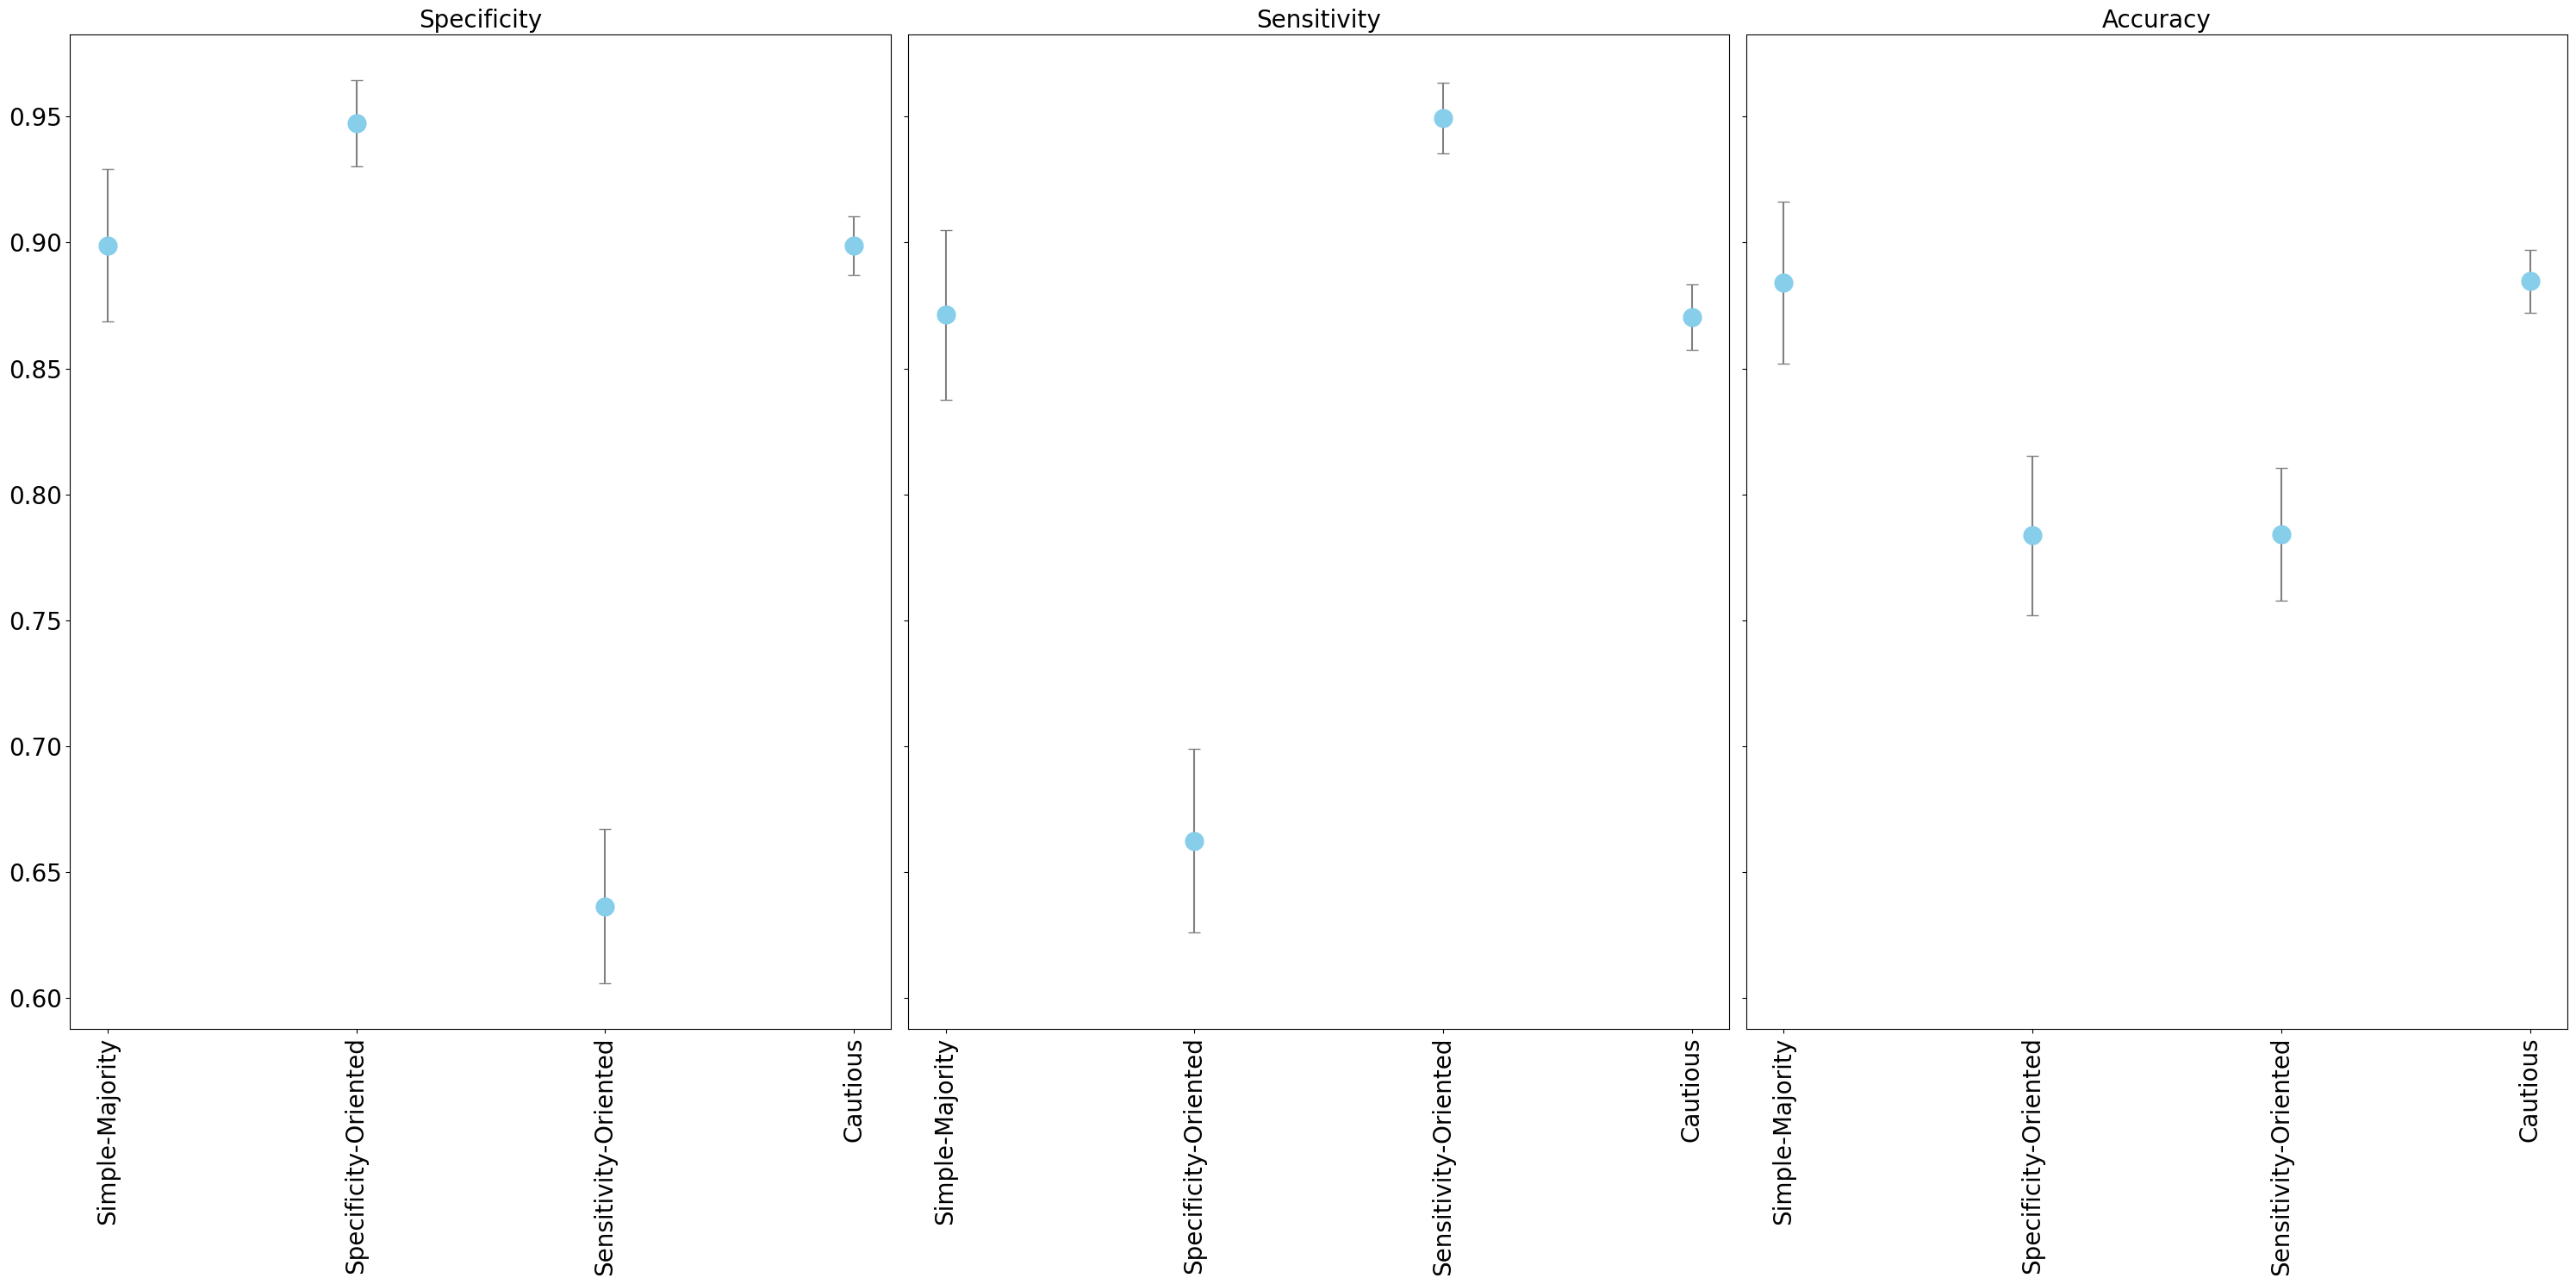

In [374]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)

for i, me in enumerate(metrics):
    points = []
    errors = []
    
    for pp in m_protocolli:
        low = IC_strong1.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['lower'][0]
        up = IC_strong1.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['upper'][0]
        mean = data_strong.filter(pl.col('Protocollo') == pp)[me][0]
        
        points.append(mean)
        errors.append([[mean - low], [up - mean]])  # errore in basso, errore in alto

    # Trasforma errors in array NumPy
    err_array = np.array(errors).T.squeeze()

    # Plot su subplot corrente
    axes[i].errorbar(
        m_protocolli,
        points,
        yerr=err_array,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='Skyblue',
        markersize=15
    )
    
    axes[i].set_title(f"{e_metrics[i]}", fontsize=20)
    axes[i].tick_params(axis='x', rotation=90, labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.savefig('Boxplot_strong.png')
plt.show()


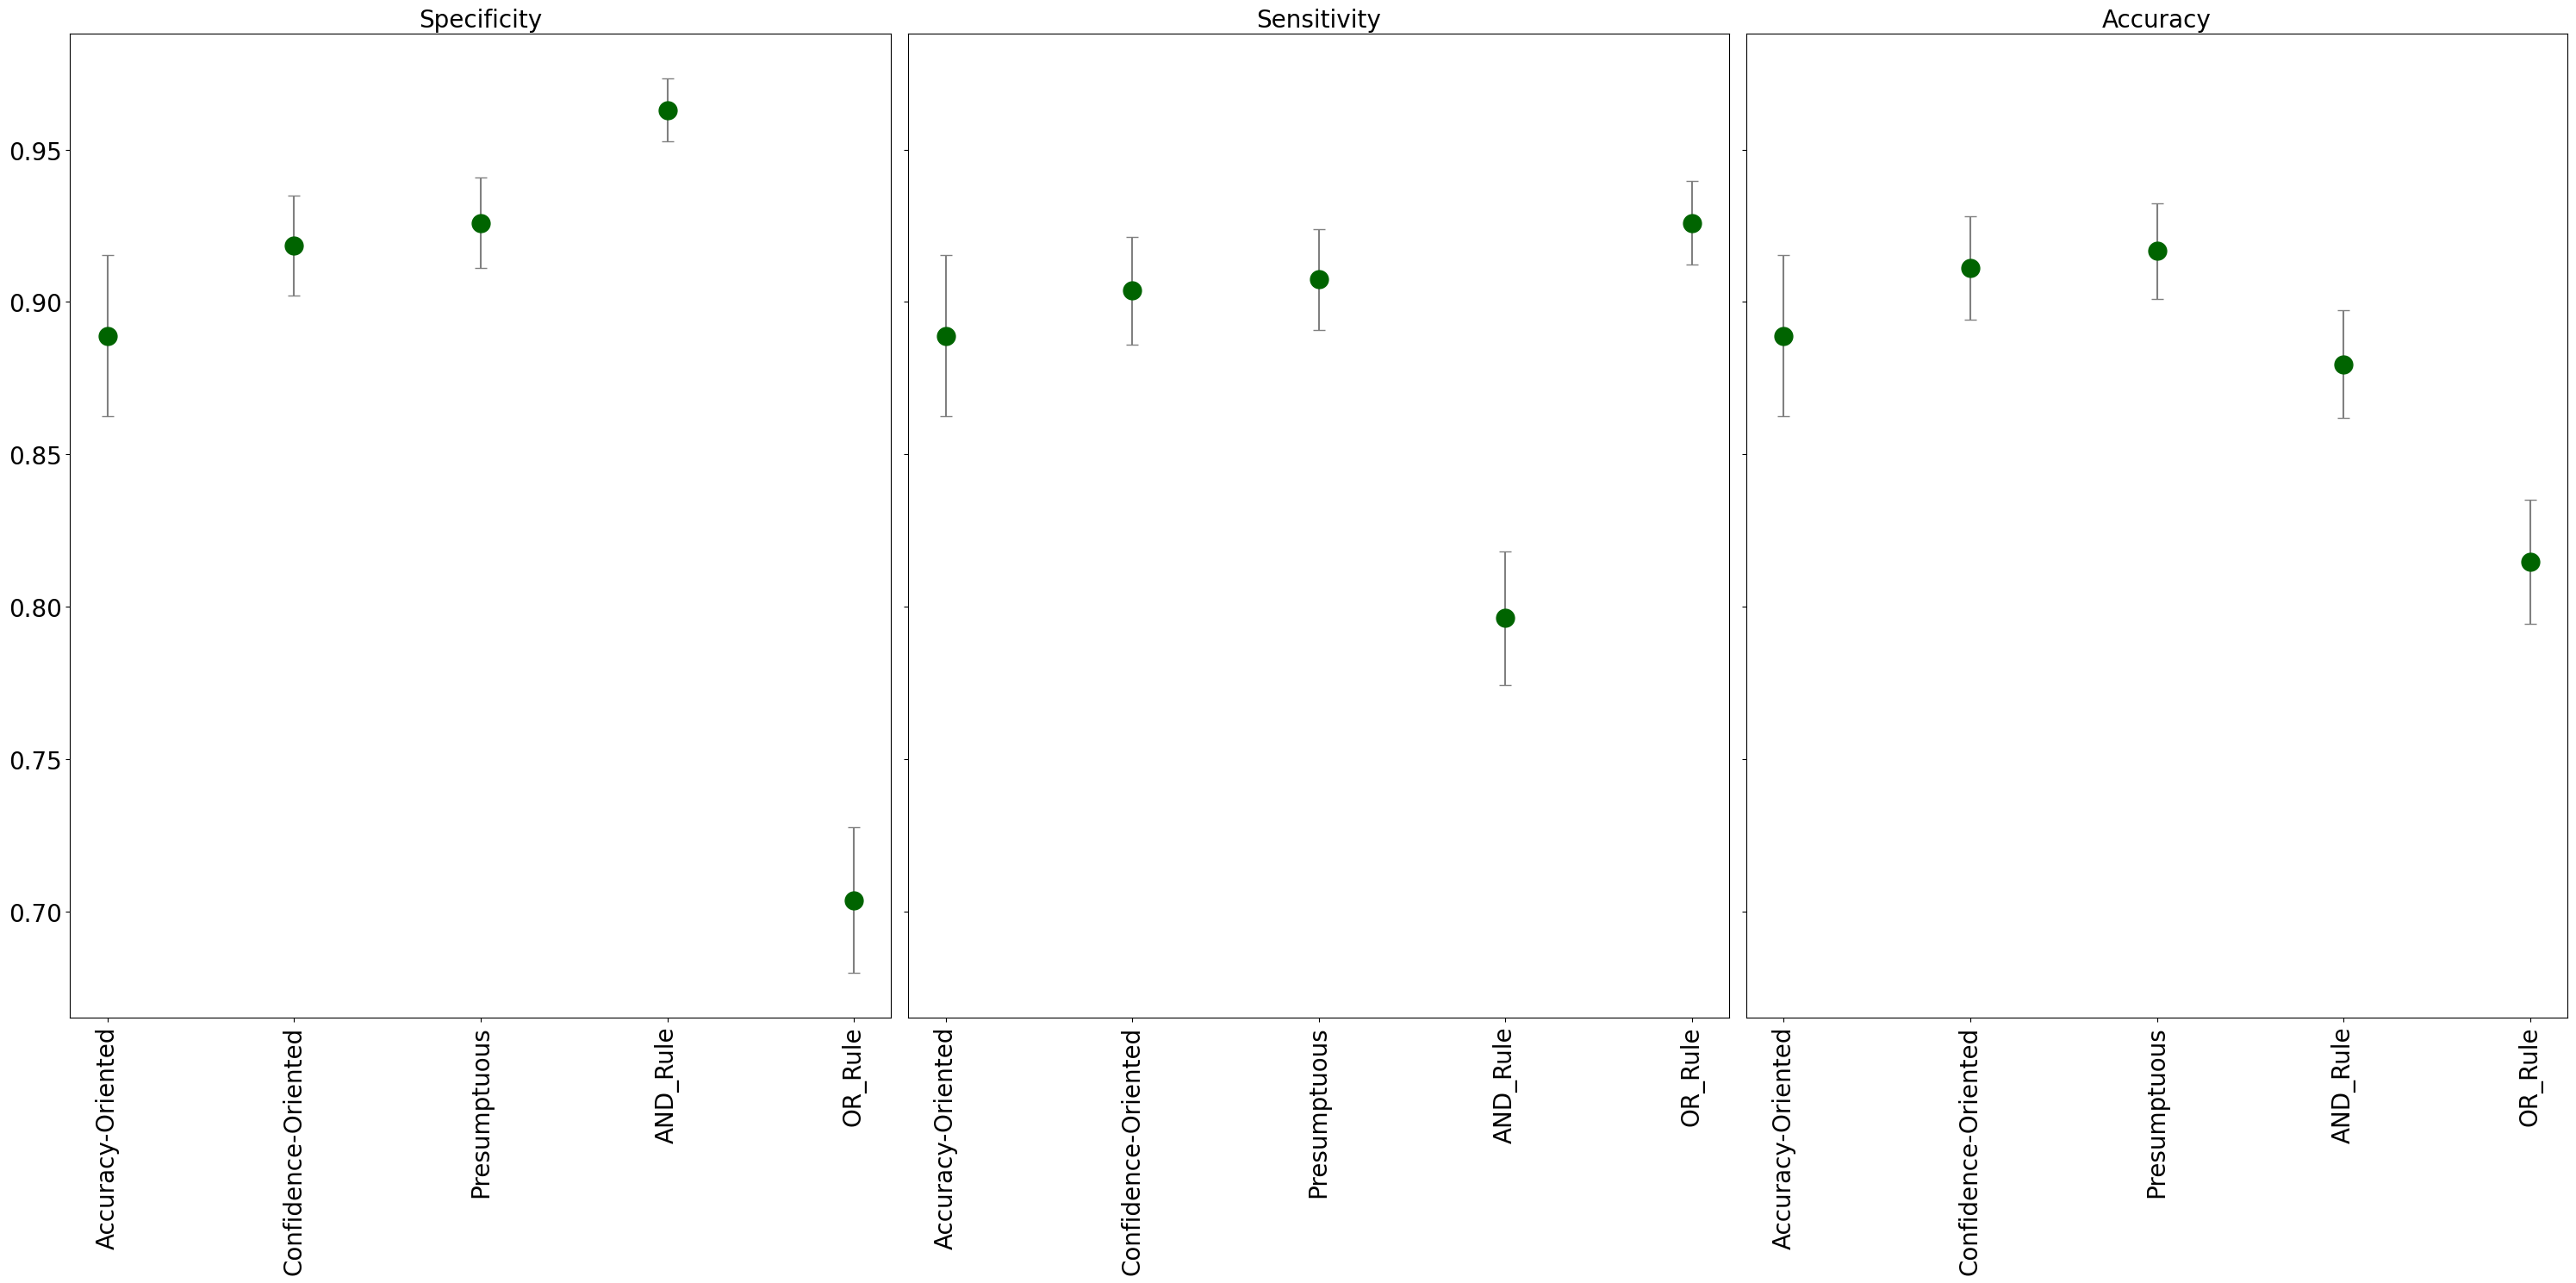

In [375]:

fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)

for i, me in enumerate(metrics):
    points = []
    errors = []
    
    for pp2 in M_protocolli:
        low = IC_w.filter((pl.col('Protocollo') == pp2) & (pl.col('metriche') == me))['lower'][0]
        up = IC_w.filter((pl.col('Protocollo') == pp2) & (pl.col('metriche') == me))['upper'][0]
        mean = data_weak.filter(pl.col('Protocollo') == pp2)[me][0]
        
        points.append(mean)
        errors.append([[np.abs(mean - low)], [up - mean]])  # errore in basso, errore in alto

    # Trasforma errors in array NumPy
    err_array = np.array(errors).T.squeeze()

    # Plot su subplot corrente
    axes[i].errorbar(
        M_protocolli,
        points,
        yerr=err_array,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='Darkgreen',
        markersize=15
    )
    
    axes[i].set_title(f"{e_metrics[i]}", fontsize=20)
    axes[i].tick_params(axis='x', rotation=90, labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.savefig('Boxplot_weak.png')
plt.show()

metrics = ['Specificità', 'Sensitività', 'Accuracy']
fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)

for i, me in enumerate(metrics):
    points = []
    errors1 = []
    errors2 = []
    
    for pp2,pp in zip(M_protocolli,m_protocolli):
        low1 = IC_w.filter((pl.col('Protocollo') == pp2) & (pl.col('metriche') == me))['lower'][0]
        up1 = IC_w.filter((pl.col('Protocollo') == pp2) & (pl.col('metriche') == me))['upper'][0]
        mean1 = data_weak.filter(pl.col('Protocollo') == pp2)[me][0]
    
        low = IC_.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['lower'][0]
        up = IC_.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['upper'][0]
        mean = data_strong.filter(pl.col('Protocollo') == pp)[me][0]
        
        points.append([mean1,mean])
        errors.append([np.abs(mean - low), np.abs(up - mean)])  # errore in basso, errore in alto
        errors1.append([np.abs(mean1 - low1), np.abs(up1 - mean1)])
    # Trasforma errors in array NumPy
    err_array = np.array([errors1,errors]).T.squeeze()
    points = np.array(points).flatten()
    # Plot su subplot corrente
    axes[i].errorbar(
        ['Accuracy-Oriented', 'Confidence-Oriented', 'Specificity-Oriented', 'Sensitivity-Oriented','Simple-Majority','Cautious', 'Presumptuous', 'AND_Rule', 'OR_Rule'],
        points,
        yerr=err_array,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='blue'
    )
    
    axes[i].set_title(f"{me}", fontsize=20)
    axes[i].tick_params(axis='x', rotation=90, labelsize=20)

plt.tight_layout()
#plt.savefig('Boxplot_strong.png')
plt.show()


### Metriche Strong Human vs Weak Human


In [414]:
#calcolo della specificity per il Simple Majority
FP = 0
VN = 0
VP = 0
FN = 0

for pp in M_protocolli: 
    for tt in case:
        temp = pl.read_csv('Weak_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
sens_w = VP / (VP + FN)            
spec_w = VN /(VN+FP)
acc_w = (VP +VN) / (VN+VP +FN +FP)

print(f'Metrics of Weak Human + Strong Protocol\nAccuracy:{round(acc_w,3)}\nSpecificity: {round(spec_w,3)}\nSensitivity: {round(sens_w,3)}')

Metrics of Weak Human + Strong Protocol
Accuracy:0.893
Specificity: 0.895
Sensitivity: 0.892


In [416]:
p1 = [spec_w, sens_w, acc_w]
IC_weak_all = []
for i, me in enumerate(metrics):
    p_i = p1[i]
    n = data_weak['Osservazioni'].sum()
    add = 1.96 * np.sqrt(p_i*(1-p_i)/n)
    low = p_i - add
    hig = p_i + add
    IC_weak_all.append([low,hig,me])    

IC_weak_all

[[0.8864769539520124, 0.9026968352217767, 'Specificità'],
 [0.8835321856719766, 0.899943597803807, 'Sensitività'],
 [0.8850043425462211, 0.9013204437785654, 'Accuracy']]

In [418]:
#calcolo della specificity per il Simple Majority
FP = 0
VN = 0
VP = 0
FN = 0

for pp in m_protocolli: 
    for tt in case:
        temp = pl.read_csv('Strong_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1

sens_s = VP / (VP + FN)            
spec_s = VN /(VN+FP)
acc_s = (VP +VN) / (VN+VP +FN +FP)


print(f'Metrics of Strong Human + Weak Protocol\nAccuracy:{round(acc_s,3)}\nSpecificity: {round(spec_s,3)}\nSensitivity: {round(sens_s,3)}')

Metrics of Strong Human + Weak Protocol
Accuracy:0.863
Specificity: 0.871
Sensitivity: 0.854


In [420]:
metrics = ['Specificità', 'Sensitività', 'Accuracy']
p2 = [spec_s, sens_s, acc_s]
IC_strong_all = []
for i, me in enumerate(metrics):
    p_i = p2[i]
    n = data_strong['Osservazioni'].sum()
    add = 1.96 * np.sqrt(p_i*(1-p_i)/n)
    low = p_i - add
    hig = p_i + add
    IC_strong_all.append([low,hig,me])    

IC_strong_all

[[0.8612561959113922, 0.8807820206491173, 'Specificità'],
 [0.8440179917740958, 0.8645709652811189, 'Sensitività'],
 [0.8524692417601797, 0.8725307582398204, 'Accuracy']]

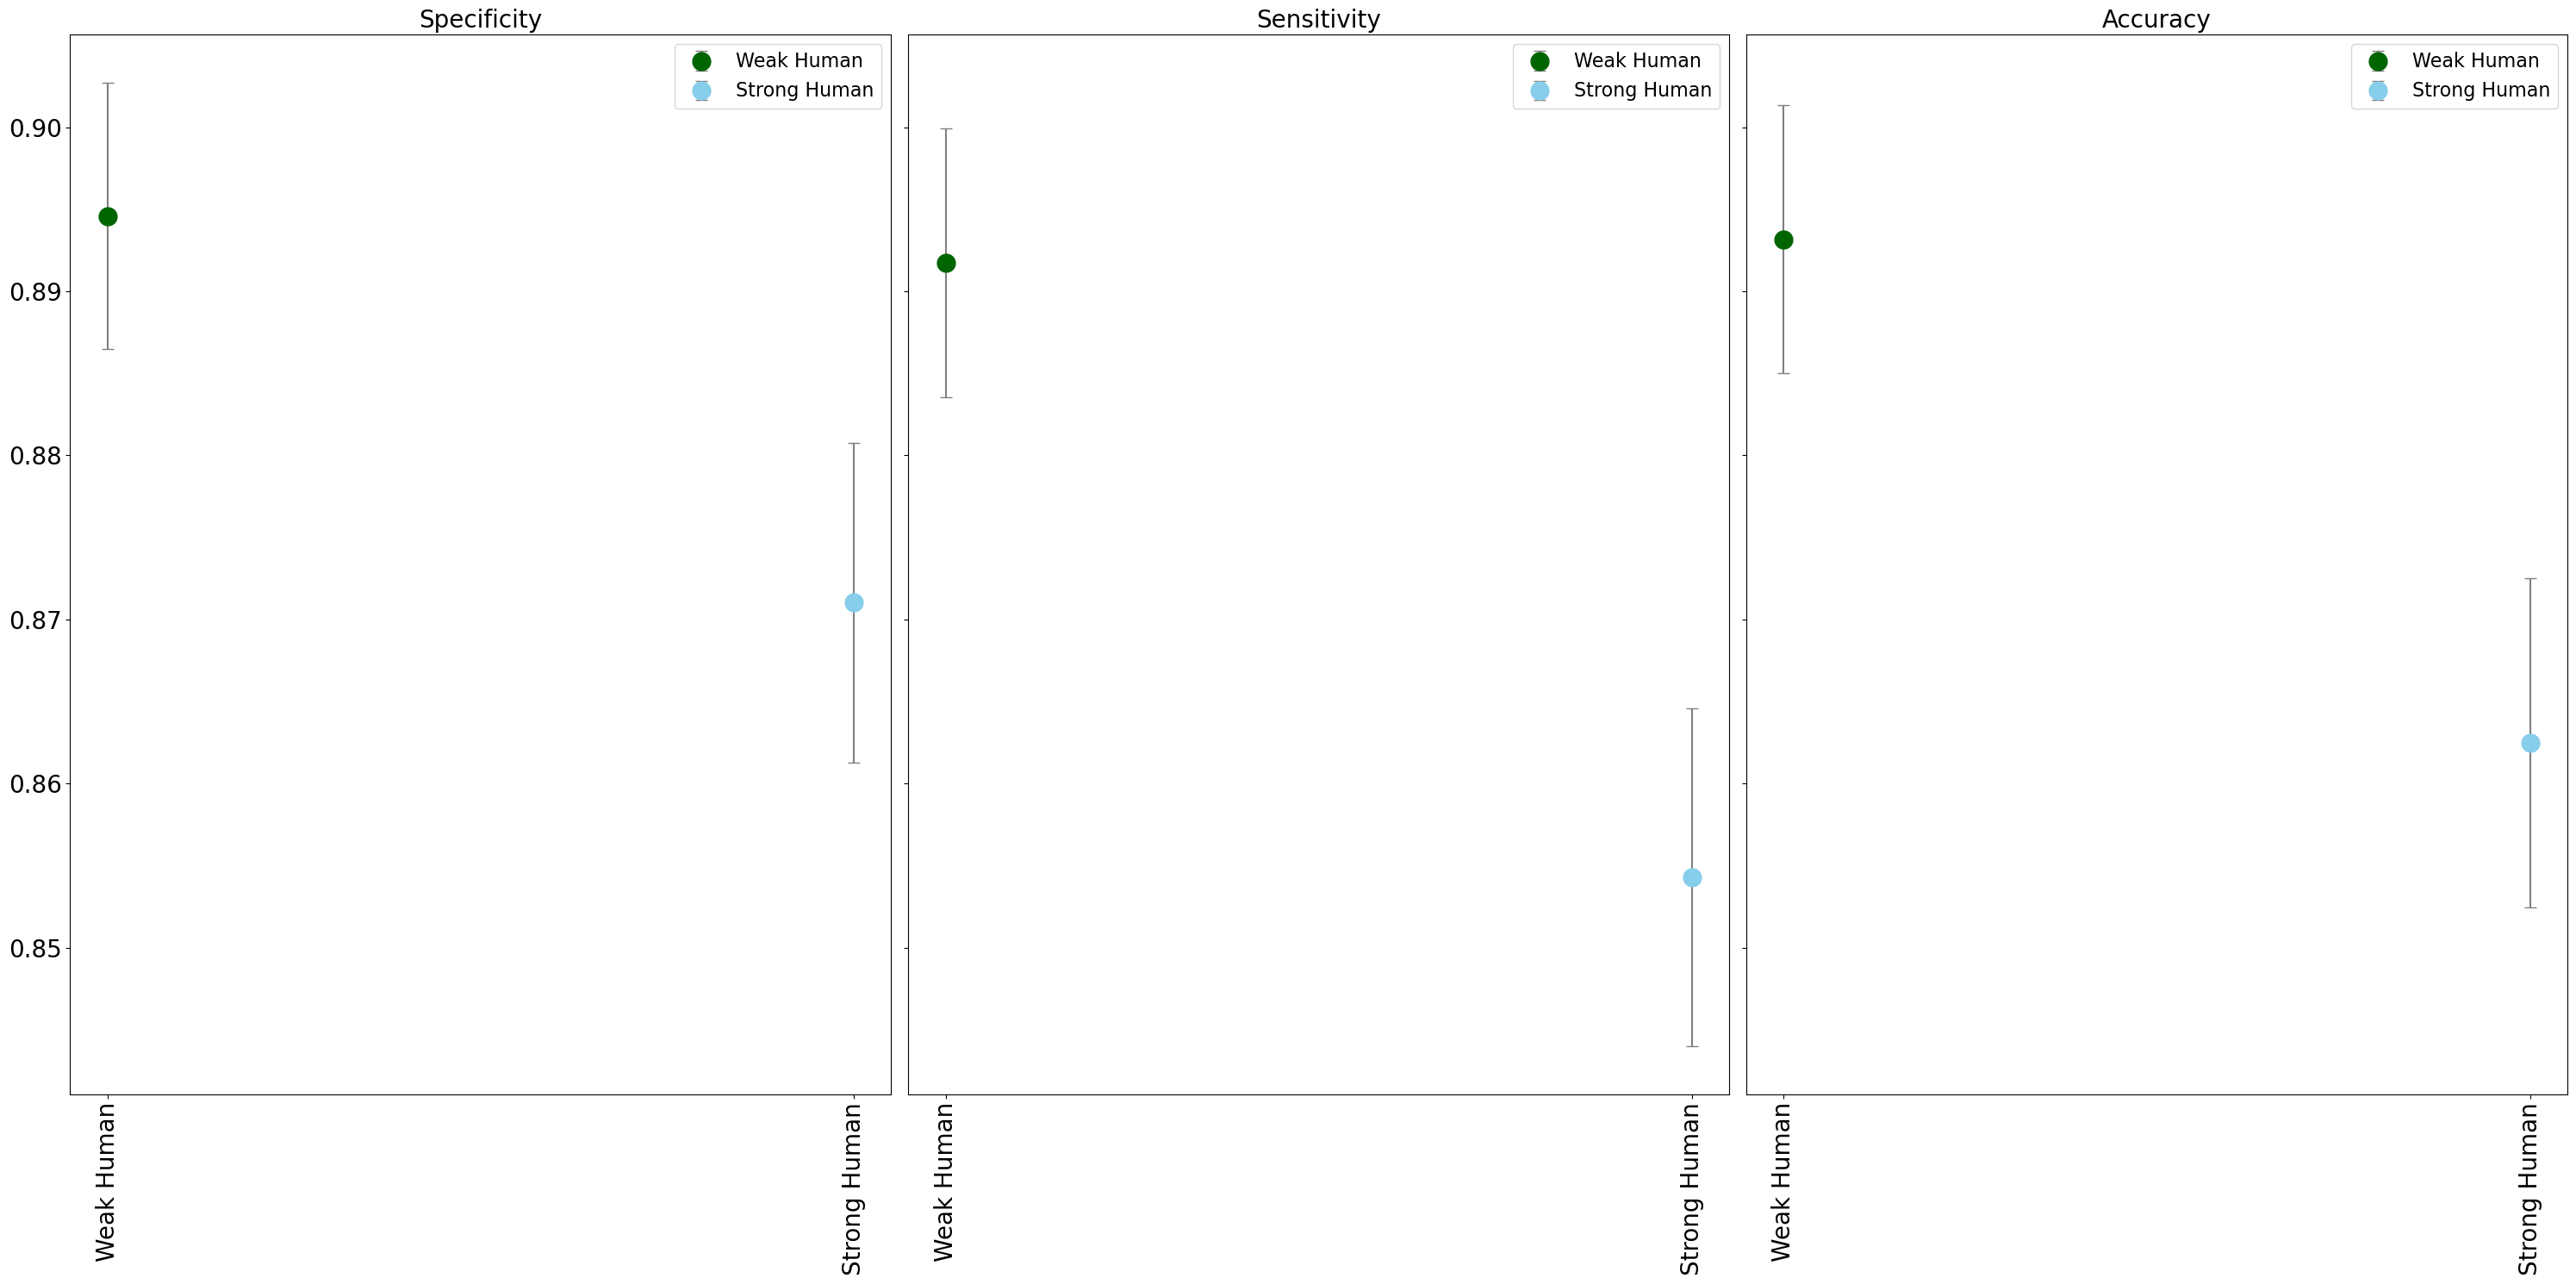

In [422]:
# weak human su protocolli forti e strong H su protocolli deboli
fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)


for i, me in enumerate(metrics):
    points = []
    errors1 = []
    errors2 = []
    low1 = IC_weak_all[i][0]
    low2 = IC_strong_all[i][0]
    up1 = IC_weak_all[i][1]
    up2 = IC_strong_all[i][1]
    mean1 = p1[i]
    mean2 = p2[i]  
    points.append([mean1,mean2])
    errors1.append([[mean1 - low1], [up1 - mean1]])  # errore in basso, errore in alto
    errors2.append([[mean2 - low2], [up2 - mean2]])
    errors1 = np.array(errors1).reshape(2,1)
    errors2 = np.array(errors2).reshape(2,1)
    # Plot su subplot corrente
    axes[i].errorbar(
        'Weak Human',
        mean1,
        yerr=errors1,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='Darkgreen',
        markersize=15,
        label = 'Weak Human'
    )
    axes[i].errorbar(
        'Strong Human',
        mean2,
        yerr=errors2,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='Skyblue',
        markersize=15,
        label = 'Strong Human'
    )
    
    axes[i].set_title(f"{e_metrics[i]}", fontsize=20, loc = 'center' )
    axes[i].tick_params(axis='x', rotation=90, labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
    axes[i].legend(fontsize=16)
plt.tight_layout()
plt.savefig('Boxplot_strong_vs_weak.png')
plt.show()

#### All protocols

In [424]:
#calcolo della specificity per il Simple Majority
FP = 0
VN = 0
VP = 0
FN = 0

for pp in protocolli: 
    for tt in case:
        temp = pl.read_csv('Weak_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
sens_w_allp = VP / (VP + FN)            
spec_w_allp = VN /(VN+FP)
acc_w_allp = (VP +VN) / (VN+VP +FN +FP)


print(f'Metrics of Weak Human \nAccuracy:{round(acc_w_allp,3)}\nSpecificity: {round(spec_w_allp,3)}\nSensitivity: {round(sens_w_allp,3)}')


p1 = [spec_w_allp, sens_w_allp, acc_w_allp]
IC_global_weak = []
for i, me in enumerate(metrics):
    p_i = p1[i]
    n = data_weak['Osservazioni'].sum()
    add = 1.96 * np.sqrt(p_i*(1-p_i)/n)
    low = p_i - add
    hig = p_i + add
    IC_global_weak.append([low,hig,me])    

IC_global_weak


Metrics of Weak Human 
Accuracy:0.858
Specificity: 0.844
Sensitivity: 0.872


[[0.8347571477304312, 0.8539061348414809, 'Specificità'],
 [0.8633355266587017, 0.8809727045146782, 'Sensitività'],
 [0.848785318703341, 0.8672215659782425, 'Accuracy']]

In [426]:
#calcolo della specificity per il Simple Majority
FP = 0
VN = 0
VP = 0
FN = 0

for pp in protocolli: 
    for tt in case:
        temp = pl.read_csv('Strong_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
sens_s_allp = VP / (VP + FN)            
spec_s_allp = VN /(VN+FP)
acc_s_allp = (VP +VN) / (VN+VP +FN +FP)


print(f'Metrics of Strong Human \nSpecificity: {round(spec_s_allp,3)}\nSensitivity: {round(sens_s_allp,3)}\nAccuracy:{round(acc_s_allp,3)}')

p2 = [spec_s_allp, sens_s_allp, acc_s_allp]
IC_strong_global = []
n = data_strong['Osservazioni'].sum()
for i, me in enumerate(metrics):
    p_i = p2[i]
    add = 1.96 * np.sqrt(p_i*(1-p_i)/n)
    low = p_i - add
    hig = p_i + add
    IC_strong_global.append([low,hig,me])    

IC_strong_global

Metrics of Strong Human 
Specificity: 0.909
Sensitivity: 0.901
Accuracy:0.905


[[0.9003863246312859, 0.917159765642077, 'Specificità'],
 [0.8923677479181611, 0.9097612439415759, 'Sensitività'],
 [0.8963445383878403, 0.9134346414228851, 'Accuracy']]

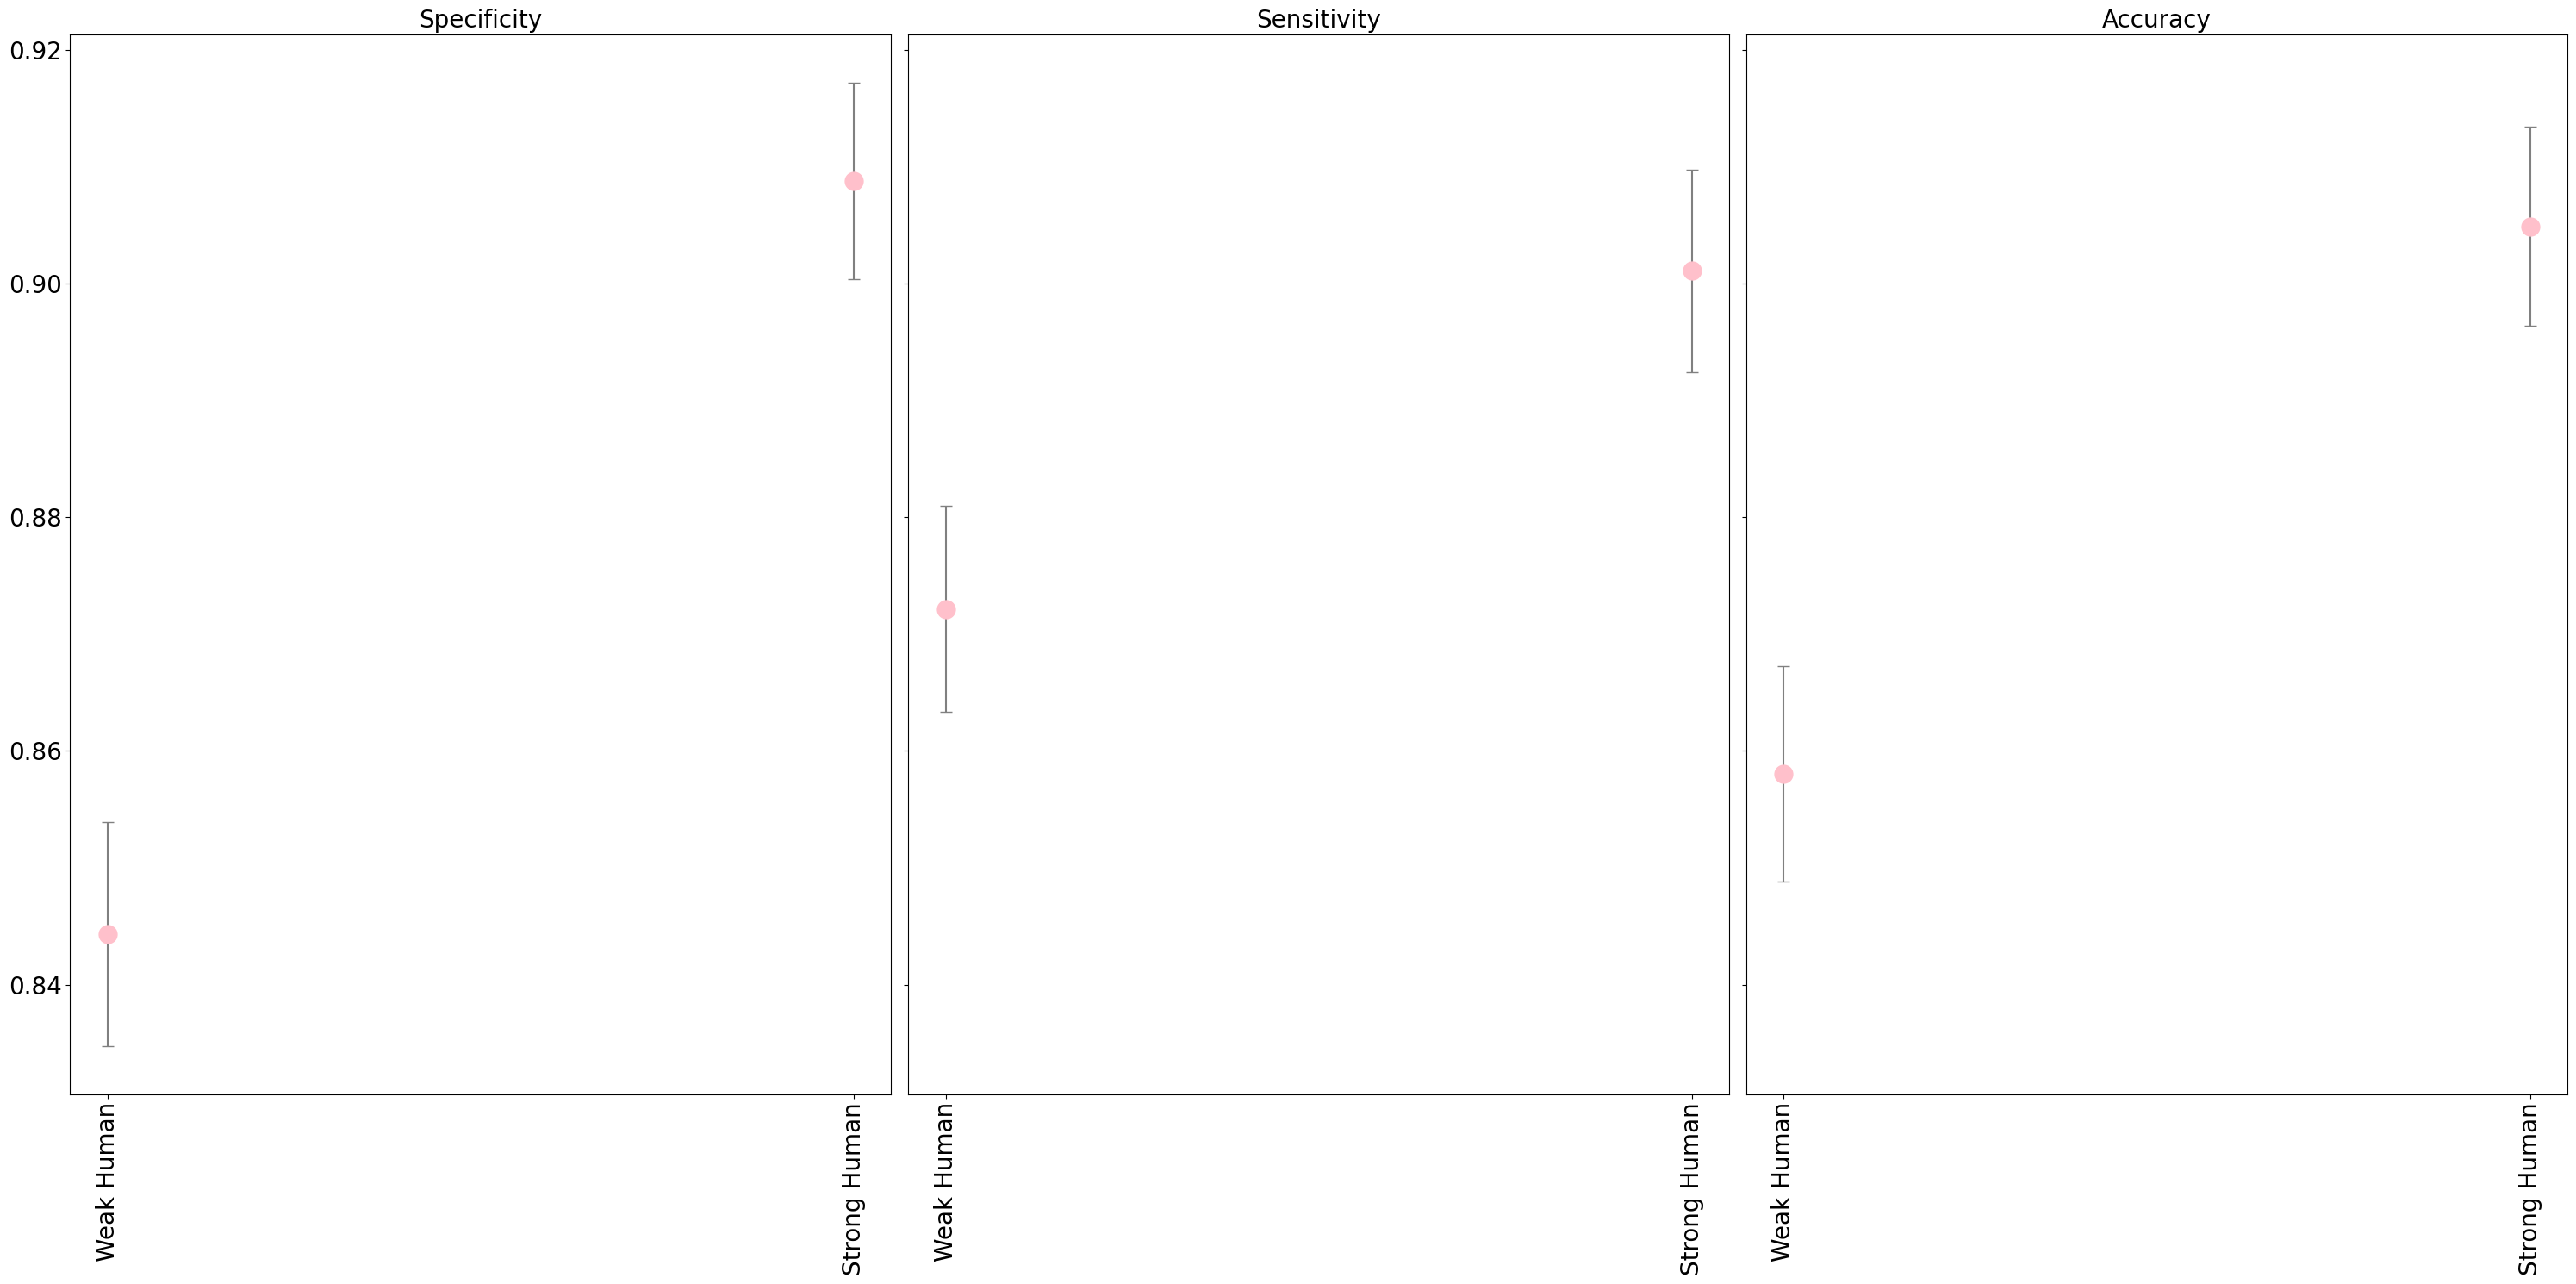

In [428]:
# weak human su protocolli forti e strong H su protocolli deboli
fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)


for i, me in enumerate(metrics):
    points = []
    errors1 = []
    errors2 = []
    low1 = IC_global_weak[i][0]
    low2 = IC_strong_global[i][0]
    up1 = IC_global_weak[i][1]
    up2 = IC_strong_global[i][1]
    mean1 = p1[i]
    mean2 = p2[i]  
    points.append([mean1,mean2])
    errors1.append([[(mean1 - low1)], [(up1 - mean1)]])  # errore in basso, errore in alto
    errors2.append([[(mean2 - low2)], [(up2 - mean2)]])
    # Trasforma errors in array NumPy
    err_array= np.array([errors1,errors2]).T.squeeze()
    points = np.array(points).flatten()

    # Plot su subplot corrente
    axes[i].errorbar(
        ['Weak Human','Strong Human'],
        points,
        yerr=err_array,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='pink',
        markersize=15
    )
    
    axes[i].set_title(f"{e_metrics[i]}", fontsize=20, loc = 'center' )
    axes[i].tick_params(axis='x', rotation=90, labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.savefig('Boxplot_strong_vs_weak_global.png')
plt.show()

### All Protocols


#### Binomial Confidence Interval

In [203]:
specificities = []
sensitivities = []
accuracies = []

for pp in protocolli: 
    FP = 0
    VN = 0
    VP = 0
    FN = 0
    for tt in case:
        temp = pl.read_csv('Strong_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
    sens = VP / (VP + FN)            
    spec = VN /(VN+FP)
    acc = (VP +VN) / (VN + VP +FN +FP)
    specificities.append(round(spec,4))    
    sensitivities.append(round(sens,4))
    accuracies.append(round(acc,4))

print(specificities)

all_strong = pl.DataFrame({"Protocollo": protocolli, "Specificità": specificities, "Sensitività": sensitivities, "Accuracy": accuracies}, orient = 'row')
all_strong

[0.8989, 0.963, 0.9099, 0.9474, 0.6364, 0.8988, 0.9222, 0.9778, 0.8556]


Protocollo,Specificità,Sensitività,Accuracy
str,f64,f64,f64
"""Simple-Majority""",0.8989,0.8713,0.8842
"""Accuracy-Oriented""",0.963,0.9679,0.9654
"""Confidence-Oriented""",0.9099,0.9062,0.908
"""Specificity-Oriented""",0.9474,0.6623,0.7836
"""Sensitivity-Oriented""",0.6364,0.9493,0.7842
"""Cautious""",0.8988,0.8704,0.8846
"""Presumptuous""",0.9222,0.9333,0.9278
"""AND_Rule""",0.9778,0.8222,0.9
"""OR_Rule""",0.8556,0.9778,0.9167


In [205]:
all_strong.write_csv('Strong_Human.csv')
all_strong_p = all_strong.to_pandas()
all_strong_p.to_latex('Strong_Human.txt', float_format="{:.4f}".format)

In [207]:
m = []
n = 0
for pp in protocolli: 
    for tt in case:
        temp = pl.read_csv('Strong_'+tt+'.csv')
        low = tt.lower()
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        n = n + dim 
    m.append(n)
print(m)

all_strong = all_strong.with_columns([pl.Series('Osservazioni',m)])

[380, 2000, 3620, 3888, 4180, 5800, 5980, 6160, 6340]


In [211]:

IC_as = []
for pp in protocolli: 
    for me in metrics:
        p = all_strong.filter(pl.col('Protocollo') == pp)[me][0]
        n = all_strong.filter(pl.col('Protocollo') == pp)['Osservazioni'][0]
        add = 1.96 * np.sqrt(p*(1-p)/n)
        low = all_strong.filter(pl.col('Protocollo') == pp)[me][0] - add
        hig = all_strong.filter(pl.col('Protocollo') == pp)[me][0] + add
        IC_as.append([low, hig, me, pp])

IC_all_s = pl.DataFrame(IC_as, schema=["lower", "upper", "metriche", "Protocollo"], orient = 'row')
IC_all_s.head()

lower,upper,metriche,Protocollo
f64,f64,str,str
0.868589,0.929211,"""Specificità""","""Simple-Majority"""
0.83763,0.90497,"""Sensitività""","""Simple-Majority"""
0.852027,0.916373,"""Accuracy""","""Simple-Majority"""
0.954727,0.971273,"""Specificità""","""Accuracy-Oriented"""
0.960175,0.975625,"""Sensitività""","""Accuracy-Oriented"""


In [215]:
specificities = []
sensitivities = []
accuracies = []

for pp in protocolli: 
    FP = 0
    VN = 0
    VP = 0
    FN = 0
    for tt in case:
        temp = pl.read_csv('Weak_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
    sens = VP / (VP + FN)            
    spec = VN /(VN+FP)
    acc = (VP +VN) / (VN+VP +FN +FP)
    specificities.append(round(spec,4))    
    sensitivities.append(round(sens,4))
    accuracies.append(round(acc,4))

all_weak = pl.DataFrame({"Protocollo": protocolli, "Specificità": specificities, "Sensitività": sensitivities, "Accuracy": accuracies}, orient = 'row')
all_weak

Protocollo,Specificità,Sensitività,Accuracy
str,f64,f64,f64
"""Simple-Majority""",0.8,0.7805,0.7917
"""Accuracy-Oriented""",0.8889,0.8889,0.8889
"""Confidence-Oriented""",0.9185,0.9037,0.9111
"""Specificity-Oriented""",0.9043,0.7581,0.8462
"""Sensitivity-Oriented""",0.6571,0.9459,0.8056
"""Cautious""",0.733,0.8514,0.7944
"""Presumptuous""",0.9259,0.9074,0.9167
"""AND_Rule""",0.963,0.7963,0.8796
"""OR_Rule""",0.7037,0.9259,0.8148


In [217]:
all_weak.write_csv('Weak_Human.csv')
all_weak_p = all_weak.to_pandas()
all_weak_p.to_latex('Weak_Human.txt')

In [219]:
m = []
n = 0
for pp in protocolli: 
    for tt in case:
        temp = pl.read_csv('Weak_'+tt+'.csv')
        low = tt.lower()
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        n = n + dim 
    m.append(n)
print(m)

all_weak = all_weak.with_columns([pl.Series('Osservazioni',m)])

[192, 732, 1272, 1428, 1572, 2000, 2108, 2216, 2324]


In [221]:
metrics = ['Specificità', 'Sensitività', 'Accuracy']
IC_aw = []
for pp in protocolli: 
    for me in metrics:
        p = all_weak.filter(pl.col('Protocollo') == pp)[me][0]
        n = all_weak.filter(pl.col('Protocollo') == pp)['Osservazioni'][0]
        add = 1.96 * np.sqrt(p*(1-p)/n)
        low = all_weak.filter(pl.col('Protocollo') == pp)[me][0] - add
        hig = all_weak.filter(pl.col('Protocollo') == pp)[me][0] + add
        IC_aw.append([low, hig, me, pp])

IC_all_w = pl.DataFrame(IC_aw, schema=["lower", "upper", "metriche", "Protocollo"], orient = 'row')
IC_all_w.head()

lower,upper,metriche,Protocollo
f64,f64,str,str
0.74342,0.85658,"""Specificità""","""Simple-Majority"""
0.721952,0.839048,"""Sensitività""","""Simple-Majority"""
0.734258,0.849142,"""Accuracy""","""Simple-Majority"""
0.866134,0.911666,"""Specificità""","""Accuracy-Oriented"""
0.866134,0.911666,"""Sensitività""","""Accuracy-Oriented"""


In [223]:
IC_weak_me

[[0.7501152042605613, 0.894329240183883, 0.8222222222222222],
 [0.6993688162414852, 0.8561867393140704, 0.7777777777777778],
 [0.7245595648258889, 0.8754404351741112, 0.8]]

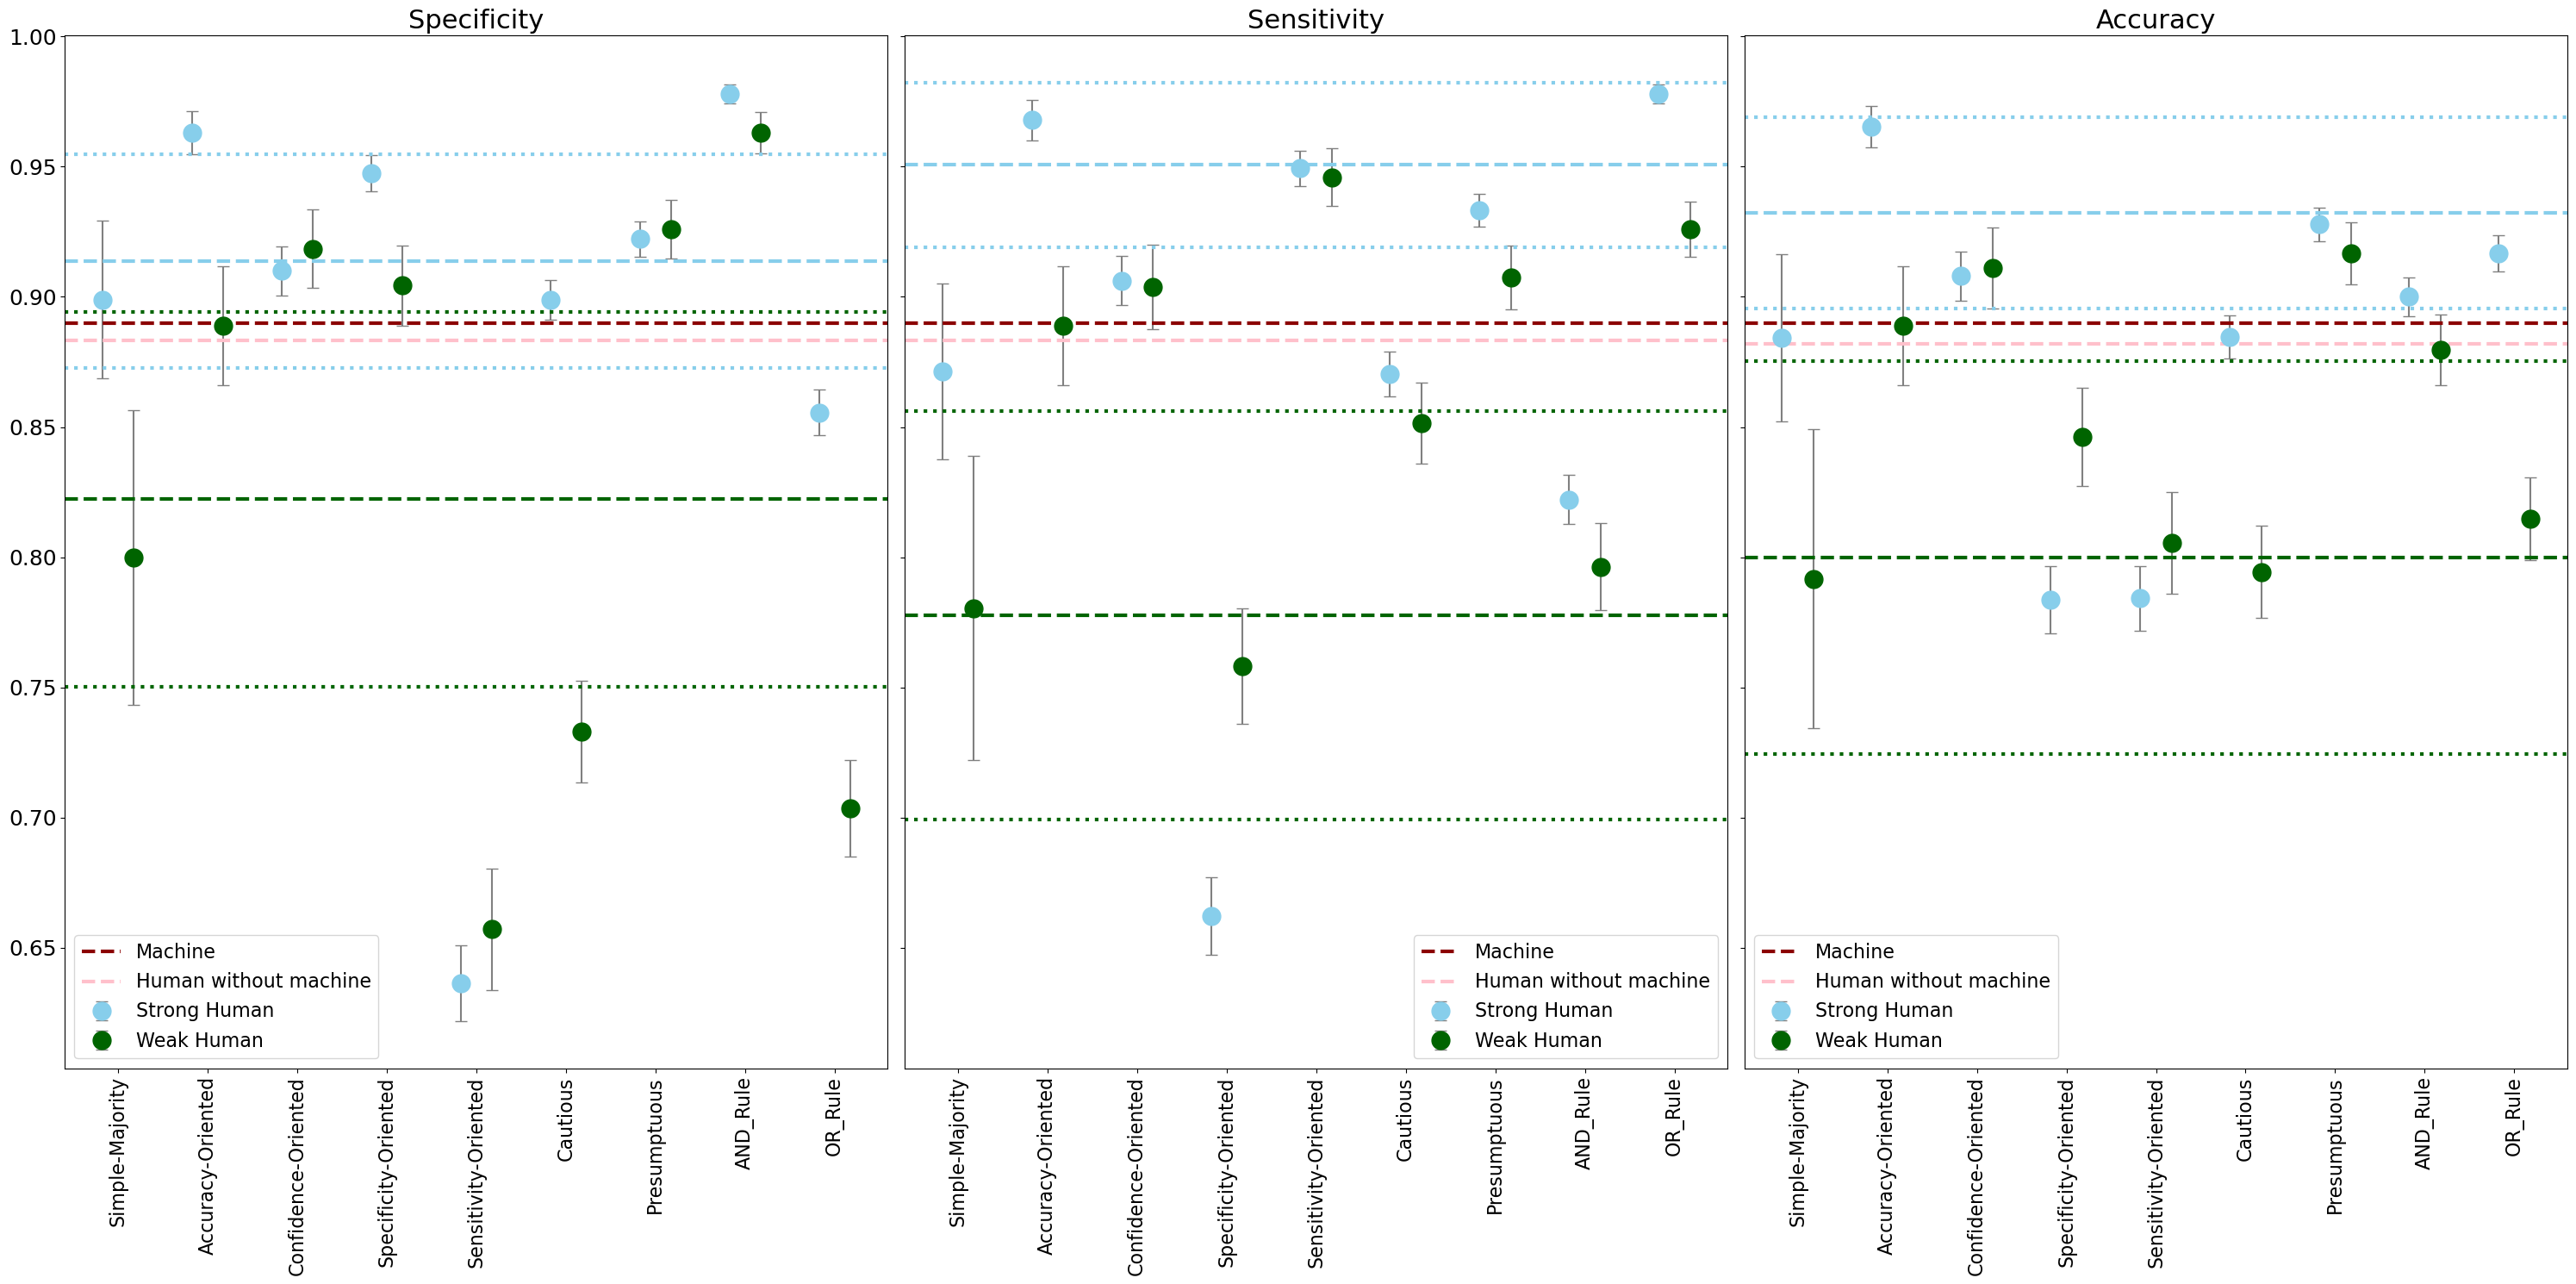

In [229]:
metrics = ['Specificità', 'Sensitività', 'Accuracy']
metriche_s = [0.95, 0.945 ,0.928]
metriche_w = [0.736, 0.78,0.805]
machine = 0.89
fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)

x = np.arange(len(protocolli))  # posizione base sull'asse X
width = 0.35  # distanza tra i punti affiancati

for i, me in enumerate(metrics):
    strong_means = []
    weak_means = []
    strong_errs = []
    weak_errs = []

    for pp in protocolli:
        # Strong
        low = IC_all_s.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['lower'][0]
        up = IC_all_s.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['upper'][0]
        mean = all_strong.filter(pl.col('Protocollo') == pp)[me][0]
        strong_means.append(mean)
        strong_errs.append([mean - low, up - mean])

        # Weak
        low1 = IC_all_w.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['lower'][0]
        up1 = IC_all_w.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['upper'][0]
        mean1 = all_weak.filter(pl.col('Protocollo') == pp)[me][0]
        weak_means.append(mean1)
        weak_errs.append([mean1 - low1, up1 - mean1])

    # Converti in array per yerr
    strong_errs = np.array(strong_errs).T  # shape (2, N)
    weak_errs = np.array(weak_errs).T

    # Plot
    axes[i].errorbar(
        x - width/2,
        strong_means,
        yerr=strong_errs,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='skyblue',
        markersize=15,
        label='Strong Human'
    )

    axes[i].errorbar(
        x + width/2,
        weak_means,
        yerr=weak_errs,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='darkgreen',
        markersize=15,
        label='Weak Human',
        
    )
    axes[i].axhline(machine, linewidth=3, color='darkred', linestyle = '--', label = 'Machine')
    axes[i].axhline(strong_metrics[i], linewidth=3, color='Skyblue', linestyle = '--')
    axes[i].axhline(IC_strong_me['lower'][i], linewidth=3, color='Skyblue', linestyle = ':')
    axes[i].axhline(IC_strong_me['upper'][i], linewidth=3, color='Skyblue', linestyle = ':')
    axes[i].axhline(IC_weak_['lower'][i], linewidth=3, color='Darkgreen', linestyle = ':')
    axes[i].axhline(weak_metrics[i], linewidth=3, color='Darkgreen', linestyle = '--')
    axes[i].axhline(IC_weak_['upper'][i], linewidth=3, color='Darkgreen', linestyle = ':')
    axes[i].axhline(metriche_h[i], linewidth=3, color='pink', linestyle = '--', label = 'Human without machine')
    axes[i].set_xticks(x)
    
    axes[i].set_xticklabels(protocolli, rotation=90, fontsize=16)
    axes[i].set_title(e_metrics[i], fontsize=22)
    axes[i].tick_params(axis='y', labelsize=18)
    axes[i].legend(fontsize=16)

plt.tight_layout()
plt.savefig('Boxplot_protocolli_all.png')
plt.show()


In [467]:
import scipy.stats
from scipy.stats import mannwhitneyu

In [469]:
mannwhitneyu(all_strong['Sensitività'], all_weak['Sensitività'], alternative='greater', axis=0, method='auto',  keepdims=False)


MannwhitneyuResult(statistic=52.0, pvalue=0.1656935481238075)

In [471]:
mannwhitneyu(all_strong['Specificità'], all_weak['Specificità'], alternative='greater', axis=0, method='auto',  keepdims=False)

MannwhitneyuResult(statistic=52.5, pvalue=0.15481488523086712)

In [473]:
mannwhitneyu(all_strong['Accuracy'], all_weak['Accuracy'], alternative='greater', axis=0, method='auto',  keepdims=False)

MannwhitneyuResult(statistic=52.5, pvalue=0.15481488523086712)

#### PAC Bound (Probably Approximately Correct Bound)

In [447]:
def bound(alpha, size):
    return np.sqrt(np.log(2/alpha)/(2*size))

In [448]:
metrics = ['Specificità', 'Sensitività', 'Accuracy']
IC_as_2 = []
for pp in protocolli: 
    for me in metrics:
        p = all_strong.filter(pl.col('Protocollo') == pp)[me][0]
        n = all_strong.filter(pl.col('Protocollo') == pp)['Osservazioni'][0]
        add = bound(0.05, n)
        low = all_strong.filter(pl.col('Protocollo') == pp)[me][0] - add
        hig = all_strong.filter(pl.col('Protocollo') == pp)[me][0] + add
        IC_as_2.append([low, hig, me, pp])

IC_all_s_2 = pl.DataFrame(IC_as_2, schema=["lower", "upper", "metriche", "Protocollo"])
IC_all_s_2.head()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20208\825063928.py:12: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  IC_all_s_2 = pl.DataFrame(IC_as_2, schema=["lower", "upper", "metriche", "Protocollo"])


lower,upper,metriche,Protocollo
f64,f64,str,str
0.829231,0.968569,"""Specificità""","""Simple-Majority"""
0.801631,0.940969,"""Sensitività""","""Simple-Majority"""
0.814531,0.953869,"""Accuracy""","""Simple-Majority"""
0.932632,0.993368,"""Specificità""","""Accuracy-Oriented"""
0.937532,0.998268,"""Sensitività""","""Accuracy-Oriented"""


In [449]:
metrics = ['Specificità', 'Sensitività', 'Accuracy']
IC_aw_2 = []
for pp in protocolli: 
    for me in metrics:
        p = all_weak.filter(pl.col('Protocollo') == pp)[me][0]
        n = all_weak.filter(pl.col('Protocollo') == pp)['Osservazioni'][0]
        add = bound(0.05, n)
        low = all_weak.filter(pl.col('Protocollo') == pp)[me][0] - add
        hig = all_weak.filter(pl.col('Protocollo') == pp)[me][0] + add
        IC_aw_2.append([low, hig, me, pp])

IC_all_w_2 = pl.DataFrame(IC_aw, schema=["lower", "upper", "metriche", "Protocollo"])
IC_all_w_2.head()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20208\1220142898.py:12: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  IC_all_w_2 = pl.DataFrame(IC_aw, schema=["lower", "upper", "metriche", "Protocollo"])


lower,upper,metriche,Protocollo
f64,f64,str,str
0.74342,0.85658,"""Specificità""","""Simple-Majority"""
0.721952,0.839048,"""Sensitività""","""Simple-Majority"""
0.734258,0.849142,"""Accuracy""","""Simple-Majority"""
0.866134,0.911666,"""Specificità""","""Accuracy-Oriented"""
0.866134,0.911666,"""Sensitività""","""Accuracy-Oriented"""


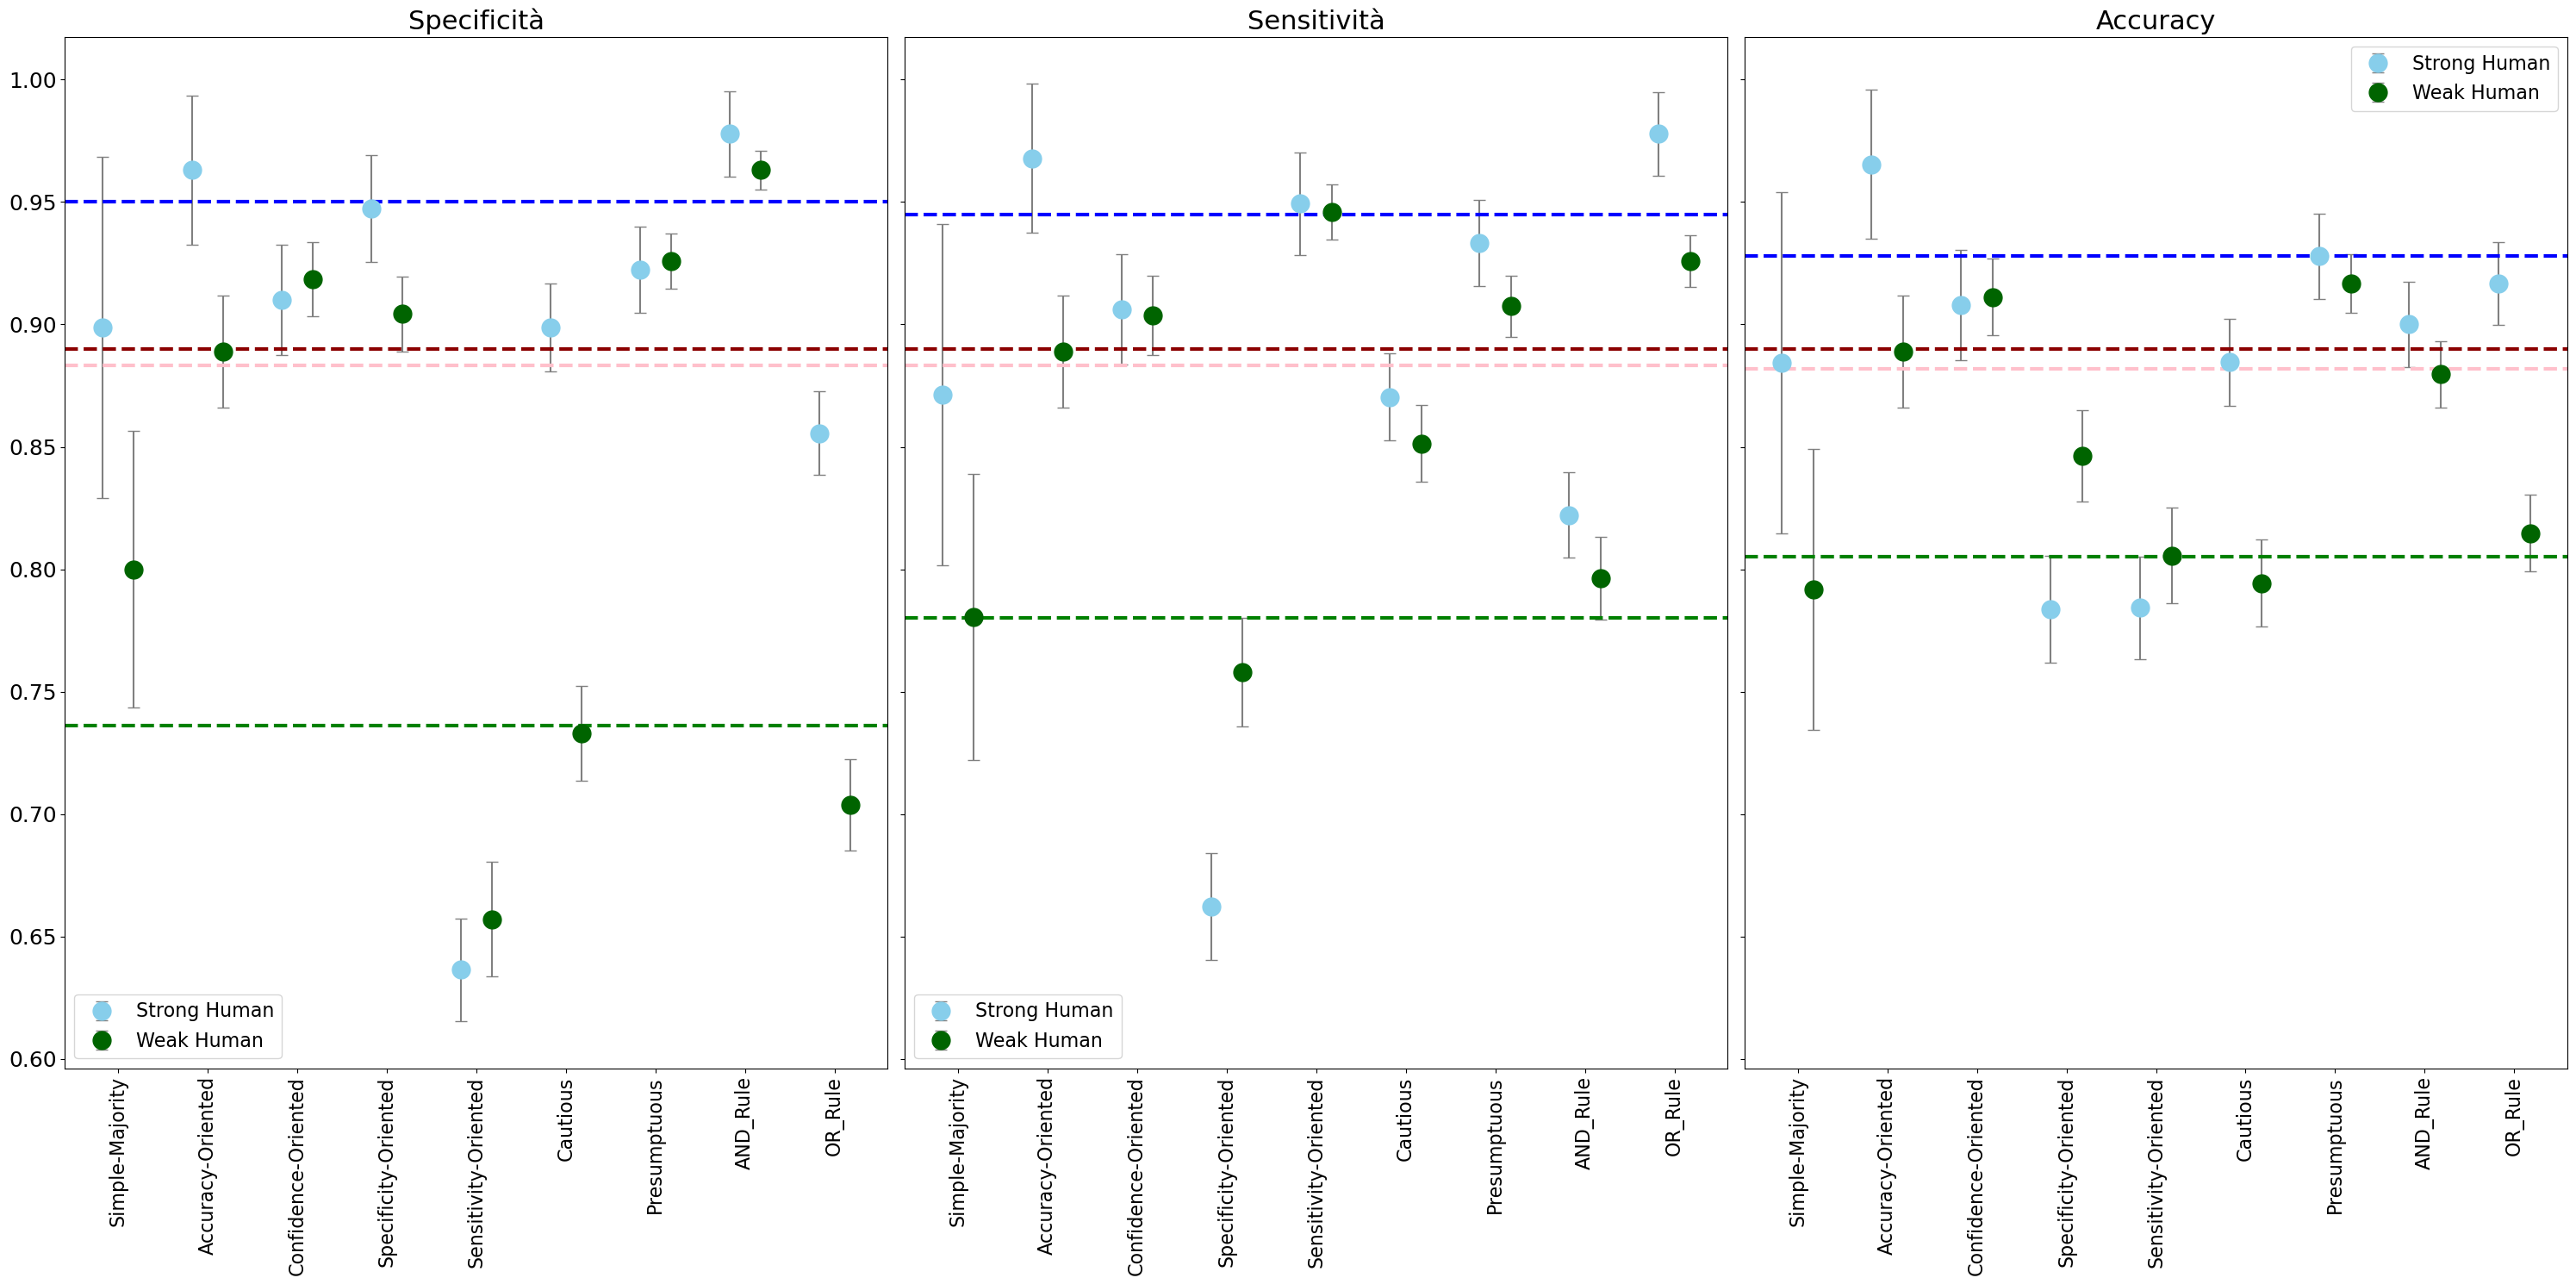

In [450]:
metrics = ['Specificità', 'Sensitività', 'Accuracy']
metriche_s = [0.95, 0.945 ,0.928]
metriche_w = [0.736, 0.78,0.805]
machine = 0.89
fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)

x = np.arange(len(protocolli))  # posizione base sull'asse X
width = 0.35  # distanza tra i punti affiancati

for i, me in enumerate(metrics):
    strong_means = []
    weak_means = []
    strong_errs = []
    weak_errs = []

    for pp in protocolli:
        # Strong
        low = IC_all_s_2.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['lower'][0]
        up = IC_all_s_2.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['upper'][0]
        mean = all_strong.filter(pl.col('Protocollo') == pp)[me][0]
        strong_means.append(mean)
        strong_errs.append([mean - low, up - mean])

        # Weak
        low1 = IC_all_w_2.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['lower'][0]
        up1 = IC_all_w_2.filter((pl.col('Protocollo') == pp) & (pl.col('metriche') == me))['upper'][0]
        mean1 = all_weak.filter(pl.col('Protocollo') == pp)[me][0]
        weak_means.append(mean1)
        weak_errs.append([mean1 - low1, up1 - mean1])

    # Converti in array per yerr
    strong_errs = np.array(strong_errs).T  # shape (2, N)
    weak_errs = np.array(weak_errs).T

    # Plot
    axes[i].errorbar(
        x - width/2,
        strong_means,
        yerr=strong_errs,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='skyblue',
        markersize=15,
        label='Strong Human'
    )

    axes[i].errorbar(
        x + width/2,
        weak_means,
        yerr=weak_errs,
        fmt='o',
        ecolor='gray',
        capsize=5,
        linestyle='None',
        color='darkgreen',
        markersize=15,
        label='Weak Human',
        
    )
    axes[i].axhline(machine, linewidth=3, color='darkred', linestyle = '--')
    axes[i].axhline(metriche_s[i], linewidth=3, color='blue', linestyle = '--')
    axes[i].axhline(metriche_w[i], linewidth=3, color='green', linestyle = '--')
    axes[i].axhline(metriche_h[i], linewidth=3, color='pink', linestyle = '--')
    axes[i].set_xticks(x)
    
    axes[i].set_xticklabels(protocolli, rotation=90, fontsize=16)
    axes[i].set_title(me, fontsize=22)
    axes[i].tick_params(axis='y', labelsize=18)
    axes[i].legend(fontsize=16)

plt.tight_layout()
plt.savefig('Boxplot_protocolli_all_2.png')
plt.show()